In [2]:
import pandas  as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import selenium
import feedparser
from bs4 import BeautifulSoup as bs
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager 
from selenium.webdriver.common.by import By 
import requests as req
from bs4 import BeautifulSoup as bs    # ambos alias son cosa mia
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
from selenium.webdriver.chrome.options import Options
# opciones del driver

opciones=Options()

# quita la bandera de ser robot
opciones.add_experimental_option('excludeSwitches', ['enable-automation'])
opciones.add_experimental_option('useAutomationExtension', False)

opciones.headless=False   # si True, no aparece la ventana (headless=no visible)

opciones.add_argument('--start-maximized')         # comienza maximizado

#opciones.add_argument('--incognito')              # incognito


In [3]:
from webdriver_manager.chrome import ChromeDriverManager

PATH=ChromeDriverManager().install()

[WDM] - Downloading: 100%|██████████| 8.84M/8.84M [00:00<00:00, 32.0MB/s]


In [4]:
import time   # para manejar tiempo

from selenium.webdriver.support.ui import WebDriverWait   # es para esperar

from selenium.webdriver.support import expected_conditions as EC  # condiciones esperadas...

from selenium.webdriver import ActionChains as AC   # acciones encadenadas, rollo doble click

from selenium.webdriver.common.keys import Keys  # manejar teclas

GET COLUMNS FROM NASA

In [309]:
url = 'https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PSCompPars'

In [310]:
driver=webdriver.Chrome(PATH, options=opciones)
html=req.get(url).content   # o .text


In [311]:
driver.get(url)

In [164]:
columnsraw = driver.find_elements(By.CSS_SELECTOR, 'div.hdrcell')

In [165]:
columnas = [e.text for e in columnsraw]

In [166]:
columnas  = columnas[2:8]

In [167]:
columnas

['  Planet Name',
 '  Number of Planets',
 '  Insolation Flux [Earth Flux]',
 '  Inclination [deg]',
 '  Stellar Surface Gravity [log10(cm/s**2)]',
 '  Stellar Age [Gyr]']

In [168]:
new = []
for e in columnas:
    new.append(e[2:].lower().replace(' ','_'))

In [169]:
columnas = new

In [170]:
columnas

['planet_name',
 'number_of_planets',
 'insolation_flux_[earth_flux]',
 'inclination_[deg]',
 'stellar_surface_gravity_[log10(cm/s**2)]',
 'stellar_age_[gyr]']

GET DATA FROM DATABASE

In [171]:
tabla1 = driver.find_element(By.XPATH, '//*[@id="icetable_icetbl_gridholder_1"]/div[2]/table')

In [178]:
tabla2 = driver.find_element(By.XPATH, '//*[@id="icetable_icetbl_gridholder_1"]/div[2]/table')

In [15]:
tabla3 = driver.find_element(By.XPATH, '//*[@id="icetable_icetbl_gridholder_1"]/div[2]/table')

In [172]:
ggggg1 =  tabla1.find_elements(By.CSS_SELECTOR, "td[valign='middle']")

In [175]:
nasa11 = [i.text for i in ggggg1]

In [22]:
#nasa1

In [176]:
zusatzcolumns = pd.DataFrame(data=nasa11)

In [177]:
zusatzcolumns.to_csv('zusatz1.csv')

In [179]:
bbbbb2 =  tabla2.find_elements(By.CSS_SELECTOR, "td[valign='middle']")

In [180]:
nosa22 = [i.text for i in bbbbb2]

In [181]:
part22 = pd.DataFrame(data=nosa22)

In [182]:
part22.to_csv('zusatz2.csv')

In [16]:
aaaaa3 =  tabla3.find_elements(By.CSS_SELECTOR, "td[valign='middle']")

In [17]:
nisa3 = [i.text for i in aaaaa3]

In [18]:
part3 = pd.DataFrame(data=nisa3)

In [19]:
part3.to_csv('part3.csv')

In [20]:
tabla4 = driver.find_element(By.XPATH, '//*[@id="icetable_icetbl_gridholder_1"]/div[2]/table')

In [21]:
ccccc4 =  tabla4.find_elements(By.CSS_SELECTOR, "td[valign='middle']")

In [22]:
nesa4 = [i.text for i in ccccc4]

In [23]:
part4 = pd.DataFrame(data=nesa4)

In [24]:
part4.to_csv('part4.csv')

In [25]:
tabla5 = driver.find_element(By.XPATH, '//*[@id="icetable_icetbl_gridholder_1"]/div[2]/table')

In [26]:
ddddd5 =  tabla5.find_elements(By.CSS_SELECTOR, "td[valign='middle']")

In [27]:
nusa5 = [i.text for i in ddddd5]

In [28]:
part5 = pd.DataFrame(data=nusa5)

In [29]:
part5.to_csv('part5.csv')

In [32]:
firstpart = pd.read_csv('part1.csv')
secondpart = pd.read_csv('part2.csv')
thirdpart = pd.read_csv('part3.csv')
fourthpart = pd.read_csv('part4.csv')
fifthpart = pd.read_csv('part5.csv')

In [35]:
firstpart = firstpart.drop(columns=['Unnamed: 0'])
secondpart = secondpart.drop(columns=['Unnamed: 0'])
thirdpart = thirdpart.drop(columns=['Unnamed: 0'])
fourthpart = fourthpart.drop(columns=['Unnamed: 0'])
fifthpart = fifthpart.drop(columns=['Unnamed: 0'])

In [50]:
firstpart = firstpart.rename(columns={firstpart.columns[0]: 'data'})
secondpart = secondpart.rename(columns={secondpart.columns[0]: 'data'})
thirdpart = thirdpart.rename(columns={thirdpart.columns[0]: 'data'})
fourthpart = fourthpart.rename(columns={fourthpart.columns[0]: 'data'})
fifthpart = fifthpart.rename(columns={fifthpart.columns[0]: 'data'})

In [51]:
data1 = list(firstpart['data'])
data2 = list(secondpart['data'])
data3 = list(thirdpart['data'])
data4 = list(fourthpart['data'])
data5 = list(fifthpart['data'])

In [56]:
len(data1), len(data2), len(data3), len(data4), len(data5)

(20178, 19278, 20106, 18900, 25344)

In [58]:
firstback = firstpart.copy()
secondback = secondpart.copy()
thirdback = thirdpart.copy()
fourthback = fourthpart.copy()
fifthback = fifthpart.copy()

In [60]:
firstback.to_csv('firstback.csv')
secondback.to_csv('secondback.csv')
thirdback.to_csv('thirdback.csv')
fourthback.to_csv('fourthback.csv')
fifthback.to_csv('fifthback.csv')

In [69]:
data1 = data1[2:]
data2 = data2[2:]
data3 = data3[2:]
data4 = data4[2:]
data5 = data5[2:]

In [84]:
test = data1

In [96]:
type(test[16])

float

In [109]:
def deletenan(dataset):
    new = []
    for i in dataset:
        if type(i) != float:
            new.append(i)
    return new

In [114]:
data1 = deletenan(data1)
data2 = deletenan(data2)
data3 = deletenan(data3)
data4 = deletenan(data4)
data5 = deletenan(data5)

In [143]:
data3[15:30]

['11 UMi b',
 '11 UMi',
 '516.21997000',
 '1.530000',
 '12.300',
 '4684.81420',
 '13.800000',
 '0.080000',
 ' ',
 ' ',
 '4213.00',
 '29.79',
 '2.78',
 '-0.020',
 '125.3210000']

In [155]:
#divide la lista en sublistas de 15 elementos. we use yield because we want to return a generator. a generator is an object that can be iterated over (one value at a time). 
#the difference to simply a return is that the generator does not store the values in memory, it generates them on the fly. this is a huge advantage when dealing with large datasets. the yield keyword is used like return, except the function will return a generator.

def divide_chunks(l, n):
    for i in range(0, len(l), n):
        yield l[i:i + n]

data1 = list(divide_chunks(data1, 15))
data2 = list(divide_chunks(data2, 15))
data3 = list(divide_chunks(data3, 15))
data4 = list(divide_chunks(data4, 15))
data5 = list(divide_chunks(data5, 15))

In [151]:
firstdf = pd.DataFrame(data1, columns=columnas)
seconddf = pd.DataFrame(data2, columns=columnas)
thirddf = pd.DataFrame(data3, columns=columnas)
fourthdf = pd.DataFrame(data4, columns=columnas)
fifthdf = pd.DataFrame(data5, columns=columnas)

In [154]:
len(firstdf) + len(seconddf) + len(thirddf) + len(fourthdf) + len(fifthdf)

5767

In [157]:
#concatenamos los dataframes
exo = pd.concat([firstdf, seconddf, thirddf, fourthdf, fifthdf], ignore_index=True)

In [160]:
exo.head()

,planet_name,host_name,orbital_period_[days],orbit_semi-major_axis_[au]),planet_radius_[earth_radius],planet_mass_or_mass*sin(i)_[earth_mass],planet_density_[g/cm**3],eccentricity,equilibrium_temperature_[k],ratio_of_semi-major_axis_to_stellar_radius,stellar_effective_temperature_[k],stellar_radius_[solar_radius],stellar_mass_[solar_mass],stellar_metallicity_[dex],distance_[pc]
0,11 Com b,11 Com,326.03000000,1.290000,12.100,6165.60000,19.100000,0.231000,,,4742.00,19.00,2.70,-0.350,93.1846000
1,11 UMi b,11 UMi,516.21997000,1.530000,12.300,4684.81420,13.800000,0.080000,,,4213.00,29.79,2.78,-0.020,125.3210000
2,14 And b,14 And,185.84000000,0.830000,12.900,1525.50000,3.900000,0.000000,,,4813.00,11.00,2.20,-0.240,75.4392000
3,14 Her b,14 Her,1765.03890112,2.773069,12.600,2586.74645,7.110000,0.372689,,,5338.00,0.93,0.91,0.405,17.9323000
4,16 Cyg B b,16 Cyg B,798.50000000,1.660000,13.500,565.73740,1.260000,0.680000,,,5750.00,1.13,1.08,0.060,21.1397000


In [159]:
exo.to_csv('exo.csv')

In [161]:
backup_exo = exo.copy()

In [162]:
backup_exo.to_csv('backup_exo.csv')

INTEGRATE EXTRA DATA

In [186]:
data1 = nasa11[2:]
data2 = nosa22[2:]

In [188]:
def deletenan(dataset):
    new = []
    for i in dataset:
        if i != '':
            new.append(i)
    return new

In [191]:
data1 = deletenan(data1)
data2 = deletenan(data2)

In [200]:
data1[6:12]

['11 UMi b', '1', ' ', ' ', '1.93', '1.560']

In [202]:
def divide_chunks(l, n):
    for i in range(0, len(l), n):
        yield l[i:i + n]

In [205]:
data1 = list(divide_chunks(data1, 6))
data2 = list(divide_chunks(data2, 6))

In [207]:
len(data2), len(data1)

(2372, 3034)

In [208]:
firstzusatz = pd.DataFrame(data1, columns=columnas)
secondzusatz = pd.DataFrame(data2, columns=columnas)

In [230]:
finalextra = pd.concat([firstzusatz, secondzusatz], ignore_index=True)

In [231]:
finalextra

,planet_name,number_of_planets,insolation_flux_[earth_flux],inclination_[deg],stellar_surface_gravity_[log10(cm/s**2)],stellar_age_[gyr]
0,11 Com b,1,,,2.31,
1,11 UMi b,1,,,1.93,1.560
2,14 And b,1,,,2.63,4.500
3,14 Her b,2,,144.652,4.45,3.900
4,16 Cyg B b,1,,,4.36,7.400
...,...,...,...,...,...,...
5401,Kepler-1784 b,1,64.80,89.510,4.41,13.800
5402,Kepler-1783 b,1,331.35,89.350,3.88,13.900
5403,Kepler-1782 b,1,84.16,87.610,4.61,14.000
5404,Kepler-1781 b,1,239.11,89.550,4.50,0.900


In [225]:
finalextra = finalextra.drop(columns=['Unnamed: 0'])

In [211]:
finalextra.to_csv('finalzusatz.csv')

In [232]:
finalextra = pd.read_csv('finalzusatz.csv')

CLEAN EXTRADATA

In [233]:
finalextra = finalextra.rename(columns={'stellar_surface_gravity_[log10(cm/s**2)]': 'stellar_surface_gravity','insolation_flux_[earth_flux]': 'insolation_flux_earth'})

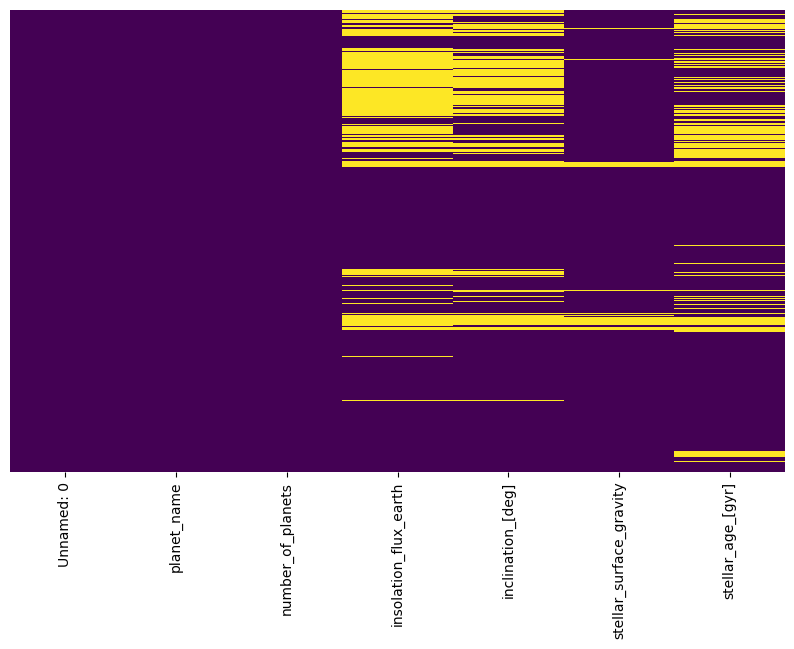

In [234]:
plt.figure(figsize=(10, 6))  

sns.heatmap(finalextra == ' ',   
            yticklabels=False,
            cmap='viridis',
            cbar=False
           )

plt.show();

In [235]:
finalextra = finalextra.drop_duplicates(subset=['planet_name'])

In [239]:
backup_finalextra = finalextra.copy()

In [240]:
backup_finalextra.to_csv('backup_finalextra.csv')

In [260]:
extra2 = finalextra.copy()

In [261]:
extra2 = extra2.drop(columns=['planet_name'])

In [262]:
extra2 = extra2.replace(' ', np.nan)

In [263]:
for i in extra2.columns:
    extra2[i] = extra2[i].astype(float)

In [264]:
def nancheck(row):
    for i in row:
        if np.isnan(i):
            return True
    return False

# aplicamos la funcion a cada fila del dataframe
extra2['nancheck'] = extra2.apply(nancheck, axis=1)

In [265]:
extra2.nancheck.value_counts()

False    3282
True     2018
Name: nancheck, dtype: int64

In [266]:
extra2 = extra2[extra2['nancheck'] == False]

In [267]:
extra2 = extra2.drop(columns=['nancheck'])

In [268]:
extra2.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3282 entries, 30 to 5299
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   number_of_planets        3282 non-null   float64
 1   insolation_flux_earth    3282 non-null   float64
 2   stellar_surface_gravity  3282 non-null   float64
 3   stellar_age_[gyr]        3282 non-null   float64
dtypes: float64(4)
memory usage: 128.2 KB


In [259]:
finalextra = finalextra.drop(columns=['inclination_[deg]'])

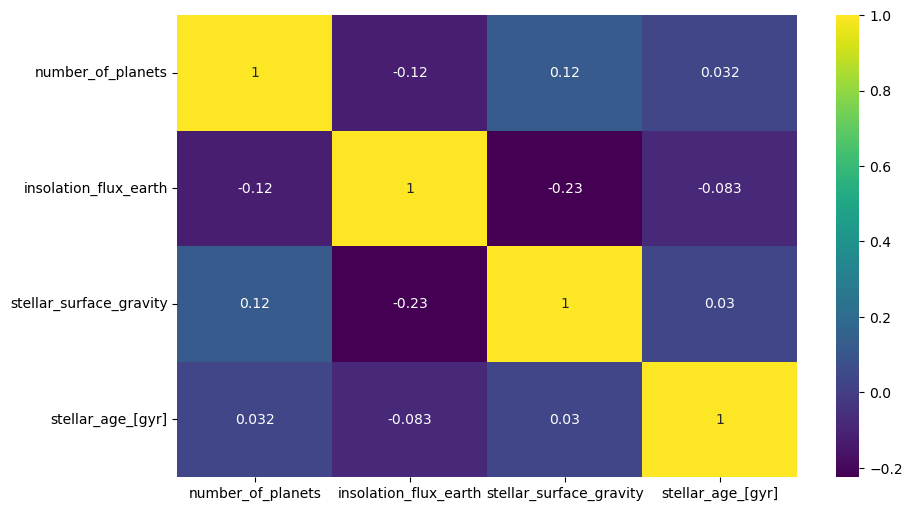

In [269]:
plt.figure(figsize=(10, 6))
sns.heatmap(extra2.corr(), annot=True, cmap='viridis')
plt.show()

CLEAN DATA

In [8]:
exo = pd.read_csv('exo.csv')

In [10]:
exo = exo.rename(columns={'planet_radius_[earth_radius]': 'planet_radius', 'planet_mass_or_mass*sin(i)_[earth_mass]': 'planet_mass', 'planet_density_[g/cm**3]': 'planet_density'})

In [12]:
exo.to_csv('exocleancolumn.csv')

In [13]:
exo.head()

,Unnamed: 0,planet_name,host_name,orbital_period_[days],orbit_semi-major_axis_[au]),planet_radius,planet_mass,planet_density,eccentricity,equilibrium_temperature_[k],ratio_of_semi-major_axis_to_stellar_radius,stellar_effective_temperature_[k],stellar_radius_[solar_radius],stellar_mass_[solar_mass],stellar_metallicity_[dex],distance_[pc]
0,0,11 Com b,11 Com,326.03000000,1.290000,12.100,6165.60000,19.100000,0.231000,,,4742.00,19.00,2.70,-0.350,93.1846000
1,1,11 UMi b,11 UMi,516.21997000,1.530000,12.300,4684.81420,13.800000,0.080000,,,4213.00,29.79,2.78,-0.020,125.3210000
2,2,14 And b,14 And,185.84000000,0.830000,12.900,1525.50000,3.900000,0.000000,,,4813.00,11.00,2.20,-0.240,75.4392000
3,3,14 Her b,14 Her,1765.03890112,2.773069,12.600,2586.74645,7.110000,0.372689,,,5338.00,0.93,0.91,0.405,17.9323000
4,4,16 Cyg B b,16 Cyg B,798.50000000,1.660000,13.500,565.73740,1.260000,0.680000,,,5750.00,1.13,1.08,0.060,21.1397000


In [15]:
exo = exo.drop(columns=['Unnamed: 0'])

In [17]:
exo.head()

,planet_name,host_name,orbital_period_[days],orbit_semi-major_axis_[au]),planet_radius,planet_mass,planet_density,eccentricity,equilibrium_temperature_[k],ratio_of_semi-major_axis_to_stellar_radius,stellar_effective_temperature_[k],stellar_radius_[solar_radius],stellar_mass_[solar_mass],stellar_metallicity_[dex],distance_[pc]
0,11 Com b,11 Com,326.03000000,1.290000,12.100,6165.60000,19.100000,0.231000,,,4742.00,19.00,2.70,-0.350,93.1846000
1,11 UMi b,11 UMi,516.21997000,1.530000,12.300,4684.81420,13.800000,0.080000,,,4213.00,29.79,2.78,-0.020,125.3210000
2,14 And b,14 And,185.84000000,0.830000,12.900,1525.50000,3.900000,0.000000,,,4813.00,11.00,2.20,-0.240,75.4392000
3,14 Her b,14 Her,1765.03890112,2.773069,12.600,2586.74645,7.110000,0.372689,,,5338.00,0.93,0.91,0.405,17.9323000
4,16 Cyg B b,16 Cyg B,798.50000000,1.660000,13.500,565.73740,1.260000,0.680000,,,5750.00,1.13,1.08,0.060,21.1397000


In [18]:
exo.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5767 entries, 0 to 5766
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   planet_name                                 5767 non-null   object
 1   host_name                                   5767 non-null   object
 2   orbital_period_[days]                       5767 non-null   object
 3   orbit_semi-major_axis_[au])                 5767 non-null   object
 4   planet_radius                               5767 non-null   object
 5   planet_mass                                 5767 non-null   object
 6   planet_density                              5767 non-null   object
 7   eccentricity                                5767 non-null   object
 8   equilibrium_temperature_[k]                 5767 non-null   object
 9   ratio_of_semi-major_axis_to_stellar_radius  5767 non-null   object
 10  stellar_effective_temper

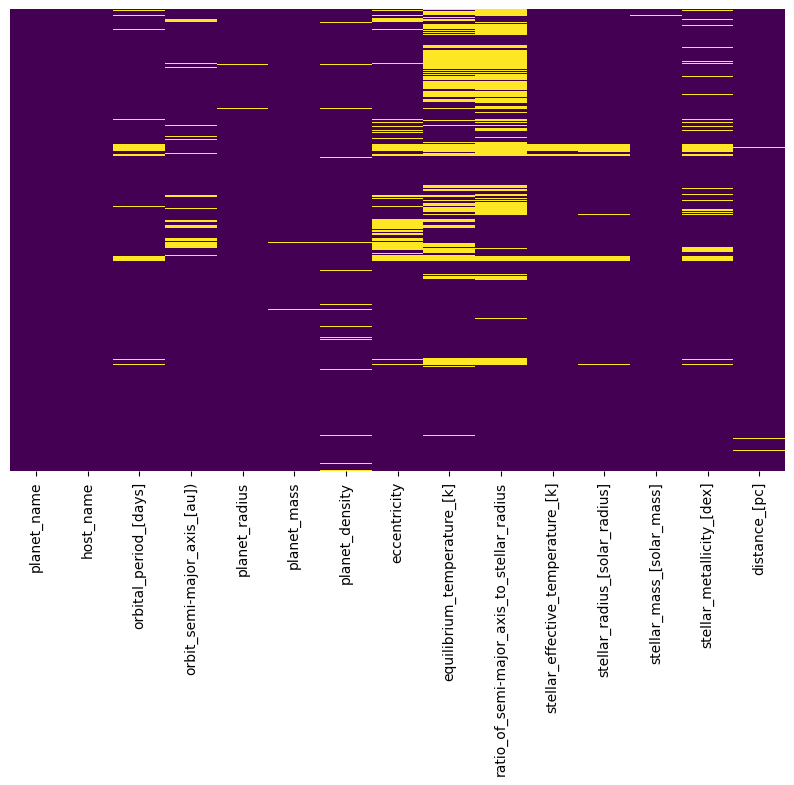

In [29]:
plt.figure(figsize=(10, 6))  

sns.heatmap(exo == ' ',   
            yticklabels=False,
            cmap='viridis',
            cbar=False
           )

plt.show();

In [42]:
test = exo.copy()

In [50]:
#en primer lugar, vamos a eliminar las filas que son dobles. es decir, que tienen el mismo nombre de planeta y el mismo nombre de estrella y mas.
test = test.drop_duplicates(subset=['planet_name', 'host_name', 'planet_radius', 'planet_mass', 'planet_density'])

In [97]:
test['Datetest'] = test['orbit_semi-major_axis_[au])'].str[0]
algo = test[test['Datetest'] == 'K']
print(len(algo))
#shark = shark.drop(algo.index)

1


In [52]:
exo = test.copy()

In [53]:
backup_exo = exo.copy()

In [55]:
exo.to_csv('exodropduplicate.csv')

In [56]:
# ahora queremos ver si hay filas que tienen al menos un valor nulo. para ello, vamos a crear una columna que nos diga si hay algun valor nulo en la fila o no.
# para ello, vamos a crear una funcion que nos diga si hay algun valor nulo en la fila o no. si hay algun valor nulo, devolvera True, si no, devolvera False.
def nancheck(row):
    for i in row:
        if i == ' ':
            return True
    return False

# aplicamos la funcion a cada fila del dataframe
exo['nancheck'] = exo.apply(nancheck, axis=1)


In [59]:
exo

,planet_name,host_name,orbital_period_[days],orbit_semi-major_axis_[au]),planet_radius,planet_mass,planet_density,eccentricity,equilibrium_temperature_[k],ratio_of_semi-major_axis_to_stellar_radius,stellar_effective_temperature_[k],stellar_radius_[solar_radius],stellar_mass_[solar_mass],stellar_metallicity_[dex],distance_[pc],Datetest,nancheck
0,11 Com b,11 Com,326.03000000,1.290000,12.100,6165.60000,19.100000,0.231000,,,4742.00,19.00,2.70,-0.350,93.1846000,11 Com b,True
1,11 UMi b,11 UMi,516.21997000,1.530000,12.300,4684.81420,13.800000,0.080000,,,4213.00,29.79,2.78,-0.020,125.3210000,11 UMi b,True
2,14 And b,14 And,185.84000000,0.830000,12.900,1525.50000,3.900000,0.000000,,,4813.00,11.00,2.20,-0.240,75.4392000,14 And b,True
3,14 Her b,14 Her,1765.03890112,2.773069,12.600,2586.74645,7.110000,0.372689,,,5338.00,0.93,0.91,0.405,17.9323000,14 Her b,True
4,16 Cyg B b,16 Cyg B,798.50000000,1.660000,13.500,565.73740,1.260000,0.680000,,,5750.00,1.13,1.08,0.060,21.1397000,16 Cyg B b,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5753,Kepler-228 d,Kepler-228,11.09428600,0.101000,4.040,15.40000,1.280000,0.000000,835,10.900000,6043.00,1.01,0.95,-0.030,1644.6100000,Kepler-228 d,False
5754,Kepler-229 b,Kepler-229,6.25297200,0.062000,2.200,5.48000,2.830000,0.000000,823,18.940000,5120.00,0.73,0.80,0.160,826.2650000,Kepler-229 b,False
5755,Kepler-229 c,Kepler-229,16.06863800,0.117000,4.920,21.50000,0.992000,0.000000,600,36.850000,5120.00,0.73,0.80,0.160,826.2650000,Kepler-229 c,False
5756,Kepler-229 d,Kepler-229,41.19491200,0.220000,3.850,14.20000,1.370000,0.000000,439,70.750000,5120.00,0.73,0.80,0.160,826.2650000,Kepler-229 d,False


In [58]:
exo.nancheck.value_counts()

False    3282
True     1984
Name: nancheck, dtype: int64

In [63]:
#ahora eliminamos la nancheck columna
exo = exo.drop(columns=['nancheck', 'Datetest'])

In [64]:
exo

,planet_name,host_name,orbital_period_[days],orbit_semi-major_axis_[au]),planet_radius,planet_mass,planet_density,eccentricity,equilibrium_temperature_[k],ratio_of_semi-major_axis_to_stellar_radius,stellar_effective_temperature_[k],stellar_radius_[solar_radius],stellar_mass_[solar_mass],stellar_metallicity_[dex],distance_[pc]
0,11 Com b,11 Com,326.03000000,1.290000,12.100,6165.60000,19.100000,0.231000,,,4742.00,19.00,2.70,-0.350,93.1846000
1,11 UMi b,11 UMi,516.21997000,1.530000,12.300,4684.81420,13.800000,0.080000,,,4213.00,29.79,2.78,-0.020,125.3210000
2,14 And b,14 And,185.84000000,0.830000,12.900,1525.50000,3.900000,0.000000,,,4813.00,11.00,2.20,-0.240,75.4392000
3,14 Her b,14 Her,1765.03890112,2.773069,12.600,2586.74645,7.110000,0.372689,,,5338.00,0.93,0.91,0.405,17.9323000
4,16 Cyg B b,16 Cyg B,798.50000000,1.660000,13.500,565.73740,1.260000,0.680000,,,5750.00,1.13,1.08,0.060,21.1397000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5753,Kepler-228 d,Kepler-228,11.09428600,0.101000,4.040,15.40000,1.280000,0.000000,835,10.900000,6043.00,1.01,0.95,-0.030,1644.6100000
5754,Kepler-229 b,Kepler-229,6.25297200,0.062000,2.200,5.48000,2.830000,0.000000,823,18.940000,5120.00,0.73,0.80,0.160,826.2650000
5755,Kepler-229 c,Kepler-229,16.06863800,0.117000,4.920,21.50000,0.992000,0.000000,600,36.850000,5120.00,0.73,0.80,0.160,826.2650000
5756,Kepler-229 d,Kepler-229,41.19491200,0.220000,3.850,14.20000,1.370000,0.000000,439,70.750000,5120.00,0.73,0.80,0.160,826.2650000


In [68]:
#ahora queremos ver los correlaciones entre las variables numericas. para ello, vamos a crear un heatmap.
exo.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5266 entries, 0 to 5757
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   planet_name                                 5266 non-null   object
 1   host_name                                   5266 non-null   object
 2   orbital_period_[days]                       5266 non-null   object
 3   orbit_semi-major_axis_[au])                 5266 non-null   object
 4   planet_radius                               5266 non-null   object
 5   planet_mass                                 5266 non-null   object
 6   planet_density                              5266 non-null   object
 7   eccentricity                                5266 non-null   object
 8   equilibrium_temperature_[k]                 5266 non-null   object
 9   ratio_of_semi-major_axis_to_stellar_radius  5266 non-null   object
 10  stellar_effective_temper

In [98]:
exo.head()

,planet_name,host_name,orbital_period_[days],orbit_semi-major_axis_[au]),planet_radius,planet_mass,planet_density,eccentricity,equilibrium_temperature_[k],ratio_of_semi-major_axis_to_stellar_radius,stellar_effective_temperature_[k],stellar_radius_[solar_radius],stellar_mass_[solar_mass],stellar_metallicity_[dex],distance_[pc]
0,11 Com b,11 Com,326.03000000,1.290000,12.100,6165.60000,19.100000,0.231000,,,4742.00,19.00,2.70,-0.350,93.1846000
1,11 UMi b,11 UMi,516.21997000,1.530000,12.300,4684.81420,13.800000,0.080000,,,4213.00,29.79,2.78,-0.020,125.3210000
2,14 And b,14 And,185.84000000,0.830000,12.900,1525.50000,3.900000,0.000000,,,4813.00,11.00,2.20,-0.240,75.4392000
3,14 Her b,14 Her,1765.03890112,2.773069,12.600,2586.74645,7.110000,0.372689,,,5338.00,0.93,0.91,0.405,17.9323000
4,16 Cyg B b,16 Cyg B,798.50000000,1.660000,13.500,565.73740,1.260000,0.680000,,,5750.00,1.13,1.08,0.060,21.1397000


In [242]:
# now first we waant to detect false rows. we will do this by checking if the first character of the column 'orbit_semi-major_axis_[au])' is a number or not. if it is not a number, we will display the row, and then we will decide if we want to drop it or not.
zahl = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ' ']
exo['Datetest'] = exo['planet_radius'].str[0]
algo = exo[exo['Datetest'].isin(zahl) == False] 
print(len(algo.index))
# now we will show the rows that we want to drop
algo

# now we will drop the rows that we want to drop
#exo = exo.drop(algo.index)

0


,planet_name,host_name,orbital_period_[days],orbit_semi-major_axis_[au]),planet_radius,planet_mass,planet_density,eccentricity,equilibrium_temperature_[k],ratio_of_semi-major_axis_to_stellar_radius,stellar_effective_temperature_[k],stellar_radius_[solar_radius],stellar_mass_[solar_mass],stellar_metallicity_[dex],distance_[pc],Datetest


In [241]:
exo

,planet_name,host_name,orbital_period_[days],orbit_semi-major_axis_[au]),planet_radius,planet_mass,planet_density,eccentricity,equilibrium_temperature_[k],ratio_of_semi-major_axis_to_stellar_radius,stellar_effective_temperature_[k],stellar_radius_[solar_radius],stellar_mass_[solar_mass],stellar_metallicity_[dex],distance_[pc]
0,11 Com b,11 Com,326.03000000,1.290000,12.100,6165.60000,19.100000,0.231000,,,4742.00,19.00,2.70,-0.350,93.1846000
1,11 UMi b,11 UMi,516.21997000,1.530000,12.300,4684.81420,13.800000,0.080000,,,4213.00,29.79,2.78,-0.020,125.3210000
2,14 And b,14 And,185.84000000,0.830000,12.900,1525.50000,3.900000,0.000000,,,4813.00,11.00,2.20,-0.240,75.4392000
3,14 Her b,14 Her,1765.03890112,2.773069,12.600,2586.74645,7.110000,0.372689,,,5338.00,0.93,0.91,0.405,17.9323000
4,16 Cyg B b,16 Cyg B,798.50000000,1.660000,13.500,565.73740,1.260000,0.680000,,,5750.00,1.13,1.08,0.060,21.1397000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5753,Kepler-228 d,Kepler-228,11.09428600,0.101000,4.040,15.40000,1.280000,0.000000,835,10.900000,6043.00,1.01,0.95,-0.030,1644.6100000
5754,Kepler-229 b,Kepler-229,6.25297200,0.062000,2.200,5.48000,2.830000,0.000000,823,18.940000,5120.00,0.73,0.80,0.160,826.2650000
5755,Kepler-229 c,Kepler-229,16.06863800,0.117000,4.920,21.50000,0.992000,0.000000,600,36.850000,5120.00,0.73,0.80,0.160,826.2650000
5756,Kepler-229 d,Kepler-229,41.19491200,0.220000,3.850,14.20000,1.370000,0.000000,439,70.750000,5120.00,0.73,0.80,0.160,826.2650000


In [138]:
#ahora hacemos una copia del dataframe para trabajar con ella. en esa copia no queremos columnas que no sean numericas. esas son las columnas planet_name y host_name.
exo2 = exo.copy()
exo2 = exo2.drop(columns=['planet_name', 'host_name'])


In [139]:
exo2

,orbital_period_[days],orbit_semi-major_axis_[au]),planet_radius,planet_mass,planet_density,eccentricity,equilibrium_temperature_[k],ratio_of_semi-major_axis_to_stellar_radius,stellar_effective_temperature_[k],stellar_radius_[solar_radius],stellar_mass_[solar_mass],stellar_metallicity_[dex],distance_[pc]
0,326.03000000,1.290000,12.100,6165.60000,19.100000,0.231000,,,4742.00,19.00,2.70,-0.350,93.1846000
1,516.21997000,1.530000,12.300,4684.81420,13.800000,0.080000,,,4213.00,29.79,2.78,-0.020,125.3210000
2,185.84000000,0.830000,12.900,1525.50000,3.900000,0.000000,,,4813.00,11.00,2.20,-0.240,75.4392000
3,1765.03890112,2.773069,12.600,2586.74645,7.110000,0.372689,,,5338.00,0.93,0.91,0.405,17.9323000
4,798.50000000,1.660000,13.500,565.73740,1.260000,0.680000,,,5750.00,1.13,1.08,0.060,21.1397000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5753,11.09428600,0.101000,4.040,15.40000,1.280000,0.000000,835,10.900000,6043.00,1.01,0.95,-0.030,1644.6100000
5754,6.25297200,0.062000,2.200,5.48000,2.830000,0.000000,823,18.940000,5120.00,0.73,0.80,0.160,826.2650000
5755,16.06863800,0.117000,4.920,21.50000,0.992000,0.000000,600,36.850000,5120.00,0.73,0.80,0.160,826.2650000
5756,41.19491200,0.220000,3.850,14.20000,1.370000,0.000000,439,70.750000,5120.00,0.73,0.80,0.160,826.2650000


In [140]:
#ahora vamos a ver las correlaciones entre las variables numericas. para ello, vamos a crear un heatmap. pero en primer lugar cambiamos los tipos de las variables numericas a float.
# pero antes, sustituimos todo lo que no es numerico por nulos y luego convertimos los nulos en ceros.
exo2 = exo2.replace(' ', np.nan)
# ahora convertimos los nulos en ceros

In [141]:
exo2.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5265 entries, 0 to 5757
Data columns (total 13 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   orbital_period_[days]                       5050 non-null   object
 1   orbit_semi-major_axis_[au])                 4982 non-null   object
 2   planet_radius                               5248 non-null   object
 3   planet_mass                                 5245 non-null   object
 4   planet_density                              5153 non-null   object
 5   eccentricity                                4560 non-null   object
 6   equilibrium_temperature_[k]                 3882 non-null   object
 7   ratio_of_semi-major_axis_to_stellar_radius  3848 non-null   object
 8   stellar_effective_temperature_[k]           5081 non-null   object
 9   stellar_radius_[solar_radius]               5061 non-null   object
 10  stellar_mass_[solar_mass

In [142]:
for i in exo2.columns:
    exo2[i] = exo2[i].astype(float)

In [148]:
#ahora cambiamos la funcion nancheck para que nos dice si hay un valur nan en la fila o no. si hay algun valor nan, devolvera True, si no, devolvera False.
def nancheck(row):
    for i in row:
        if np.isnan(i):
            return True
    return False

# aplicamos la funcion a cada fila del dataframe
exo2['nancheck'] = exo2.apply(nancheck, axis=1)

In [149]:
exo2.nancheck.value_counts()

False    3281
True     1984
Name: nancheck, dtype: int64

In [150]:
exo2

,orbital_period_[days],orbit_semi-major_axis_[au]),planet_radius,planet_mass,planet_density,eccentricity,equilibrium_temperature_[k],ratio_of_semi-major_axis_to_stellar_radius,stellar_effective_temperature_[k],stellar_radius_[solar_radius],stellar_mass_[solar_mass],stellar_metallicity_[dex],distance_[pc],nancheck
0,326.030000,1.290000,12.10,6165.60000,19.100,0.231000,NaN,NaN,4742.0,19.00,2.70,-0.350,93.1846,True
1,516.219970,1.530000,12.30,4684.81420,13.800,0.080000,NaN,NaN,4213.0,29.79,2.78,-0.020,125.3210,True
2,185.840000,0.830000,12.90,1525.50000,3.900,0.000000,NaN,NaN,4813.0,11.00,2.20,-0.240,75.4392,True
3,1765.038901,2.773069,12.60,2586.74645,7.110,0.372689,NaN,NaN,5338.0,0.93,0.91,0.405,17.9323,True
4,798.500000,1.660000,13.50,565.73740,1.260,0.680000,NaN,NaN,5750.0,1.13,1.08,0.060,21.1397,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5753,11.094286,0.101000,4.04,15.40000,1.280,0.000000,835.0,10.900,6043.0,1.01,0.95,-0.030,1644.6100,False
5754,6.252972,0.062000,2.20,5.48000,2.830,0.000000,823.0,18.940,5120.0,0.73,0.80,0.160,826.2650,False
5755,16.068638,0.117000,4.92,21.50000,0.992,0.000000,600.0,36.850,5120.0,0.73,0.80,0.160,826.2650,False
5756,41.194912,0.220000,3.85,14.20000,1.370,0.000000,439.0,70.750,5120.0,0.73,0.80,0.160,826.2650,False


In [174]:
exo2.to_csv('exo_correlation.csv')

In [151]:
#ahora para hacer el heatmap y por eso que tiene sentido, solo usamos las filas que no tienen valores nulos.
exo2 = exo2.dropna()
# eso es porque si hay valores nulos, el heatmap no tiene sentido. dropna hace que si hay algun valor nulo en la fila, la fila se elimine.
#ahora eliminamos la nancheck columna
exo2 = exo2.drop(columns=['nancheck'])

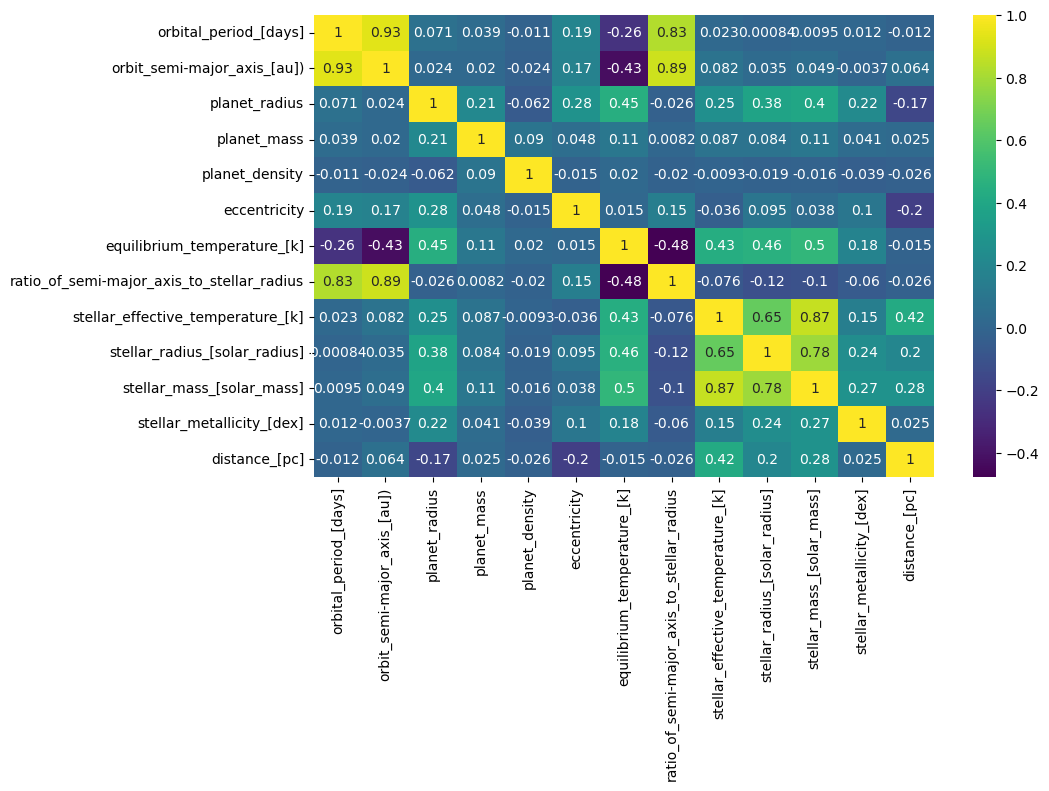

In [154]:
#eso funciona ahora porque no hay valores nulos en el dataframe.
#ahora vamos a crear el heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(exo2.corr(), annot=True, cmap='viridis')
plt.show()

NOW SET BOTH DATAFRAMES TOGETHER TO SEE COMPLETE CORRELATIONS AND PREPARE FOR POSSIBLE MACHINE LEARNING

In [271]:
exo = exo.drop(columns=['Datetest'])

In [277]:
# ahora queremos hacer un join de dos dataframes, que son exo y finalextra. para ello, vamos a hacer un join de los dos dataframes por el nombre del planeta.
# primero, vamos a renombrar las columnas de extra2 para que no haya columnas con el mismo nombre en los dos dataframes.
finalextra = finalextra.rename(columns={'planet_name': 'planet_name2'})

In [279]:
#ahora hacemos el join
exo_join = exo.merge(finalextra, how='left', left_on='planet_name', right_on='planet_name2')

In [280]:
exo_join

,planet_name,host_name,orbital_period_[days],orbit_semi-major_axis_[au]),planet_radius,planet_mass,planet_density,eccentricity,equilibrium_temperature_[k],ratio_of_semi-major_axis_to_stellar_radius,stellar_effective_temperature_[k],stellar_radius_[solar_radius],stellar_mass_[solar_mass],stellar_metallicity_[dex],distance_[pc],planet_name2,number_of_planets,insolation_flux_earth,stellar_surface_gravity,stellar_age_[gyr]
0,11 Com b,11 Com,326.03000000,1.290000,12.100,6165.60000,19.100000,0.231000,,,4742.00,19.00,2.70,-0.350,93.1846000,11 Com b,1,,2.31,
1,11 UMi b,11 UMi,516.21997000,1.530000,12.300,4684.81420,13.800000,0.080000,,,4213.00,29.79,2.78,-0.020,125.3210000,11 UMi b,1,,1.93,1.560
2,14 And b,14 And,185.84000000,0.830000,12.900,1525.50000,3.900000,0.000000,,,4813.00,11.00,2.20,-0.240,75.4392000,14 And b,1,,2.63,4.500
3,14 Her b,14 Her,1765.03890112,2.773069,12.600,2586.74645,7.110000,0.372689,,,5338.00,0.93,0.91,0.405,17.9323000,14 Her b,2,,4.45,3.900
4,16 Cyg B b,16 Cyg B,798.50000000,1.660000,13.500,565.73740,1.260000,0.680000,,,5750.00,1.13,1.08,0.060,21.1397000,16 Cyg B b,1,,4.36,7.400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5260,Kepler-228 d,Kepler-228,11.09428600,0.101000,4.040,15.40000,1.280000,0.000000,835,10.900000,6043.00,1.01,0.95,-0.030,1644.6100000,Kepler-228 d,3,122.78,4.47,0.300
5261,Kepler-229 b,Kepler-229,6.25297200,0.062000,2.200,5.48000,2.830000,0.000000,823,18.940000,5120.00,0.73,0.80,0.160,826.2650000,Kepler-229 b,3,76.22,4.63,1.100
5262,Kepler-229 c,Kepler-229,16.06863800,0.117000,4.920,21.50000,0.992000,0.000000,600,36.850000,5120.00,0.73,0.80,0.160,826.2650000,Kepler-229 c,3,21.64,4.63,1.100
5263,Kepler-229 d,Kepler-229,41.19491200,0.220000,3.850,14.20000,1.370000,0.000000,439,70.750000,5120.00,0.73,0.80,0.160,826.2650000,Kepler-229 d,3,6.16,4.63,1.100


In [285]:
exo_join = exo_join.drop(columns=['planet_name2'])

In [286]:
exo_join.to_csv('exoplanets.csv')

In [287]:
backup_exoplanets_full = exo_join.copy()

In [288]:
backup_exoplanets_full.to_csv('backup_exoplanets_full.csv')

CLEAN JOINED DATA

In [290]:
# ahora queremos ver los correlaciones dentro de las columnas en el exo_join dataframe que hemos creado. para ello, vamos a crear un heatmap. pero empezamos con el limpieza de las filas. eso lo hacemos con la funcion nancheck que hemos creado antes.
#ahora hacemos una copia del dataframe para trabajar con ella. en esa copia no queremos columnas que no sean numericas. esas son las columnas planet_name y host_name.
exo_join2 = exo_join.copy()
exo_join2 = exo_join2.drop(columns=['planet_name', 'host_name'])

In [291]:
exo_join2 = exo_join2.replace(' ', np.nan)

In [293]:
for i in exo_join2.columns:
    exo_join2[i] = exo_join2[i].astype(float)

In [295]:
def nancheck(row):
    for i in row:
        if np.isnan(i):
            return True
    return False

# aplicamos la funcion a cada fila del dataframe
exo_join2['nancheck'] = exo_join2.apply(nancheck, axis=1)

In [297]:
exo_join2

,orbital_period_[days],orbit_semi-major_axis_[au]),planet_radius,planet_mass,planet_density,eccentricity,equilibrium_temperature_[k],ratio_of_semi-major_axis_to_stellar_radius,stellar_effective_temperature_[k],stellar_radius_[solar_radius],stellar_mass_[solar_mass],stellar_metallicity_[dex],distance_[pc],number_of_planets,insolation_flux_earth,stellar_surface_gravity,stellar_age_[gyr],nancheck
0,326.030000,1.290000,12.10,6165.60000,19.100,0.231000,NaN,NaN,4742.0,19.00,2.70,-0.350,93.1846,1.0,NaN,2.31,NaN,True
1,516.219970,1.530000,12.30,4684.81420,13.800,0.080000,NaN,NaN,4213.0,29.79,2.78,-0.020,125.3210,1.0,NaN,1.93,1.56,True
2,185.840000,0.830000,12.90,1525.50000,3.900,0.000000,NaN,NaN,4813.0,11.00,2.20,-0.240,75.4392,1.0,NaN,2.63,4.50,True
3,1765.038901,2.773069,12.60,2586.74645,7.110,0.372689,NaN,NaN,5338.0,0.93,0.91,0.405,17.9323,2.0,NaN,4.45,3.90,True
4,798.500000,1.660000,13.50,565.73740,1.260,0.680000,NaN,NaN,5750.0,1.13,1.08,0.060,21.1397,1.0,NaN,4.36,7.40,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5260,11.094286,0.101000,4.04,15.40000,1.280,0.000000,835.0,10.900,6043.0,1.01,0.95,-0.030,1644.6100,3.0,122.78,4.47,0.30,False
5261,6.252972,0.062000,2.20,5.48000,2.830,0.000000,823.0,18.940,5120.0,0.73,0.80,0.160,826.2650,3.0,76.22,4.63,1.10,False
5262,16.068638,0.117000,4.92,21.50000,0.992,0.000000,600.0,36.850,5120.0,0.73,0.80,0.160,826.2650,3.0,21.64,4.63,1.10,False
5263,41.194912,0.220000,3.85,14.20000,1.370,0.000000,439.0,70.750,5120.0,0.73,0.80,0.160,826.2650,3.0,6.16,4.63,1.10,False


In [296]:
exo_join2.nancheck.value_counts()

False    3026
True     2239
Name: nancheck, dtype: int64

In [301]:
exo_join2 = exo_join2.dropna()
exo_join2 = exo_join2.drop(columns=['nancheck'])

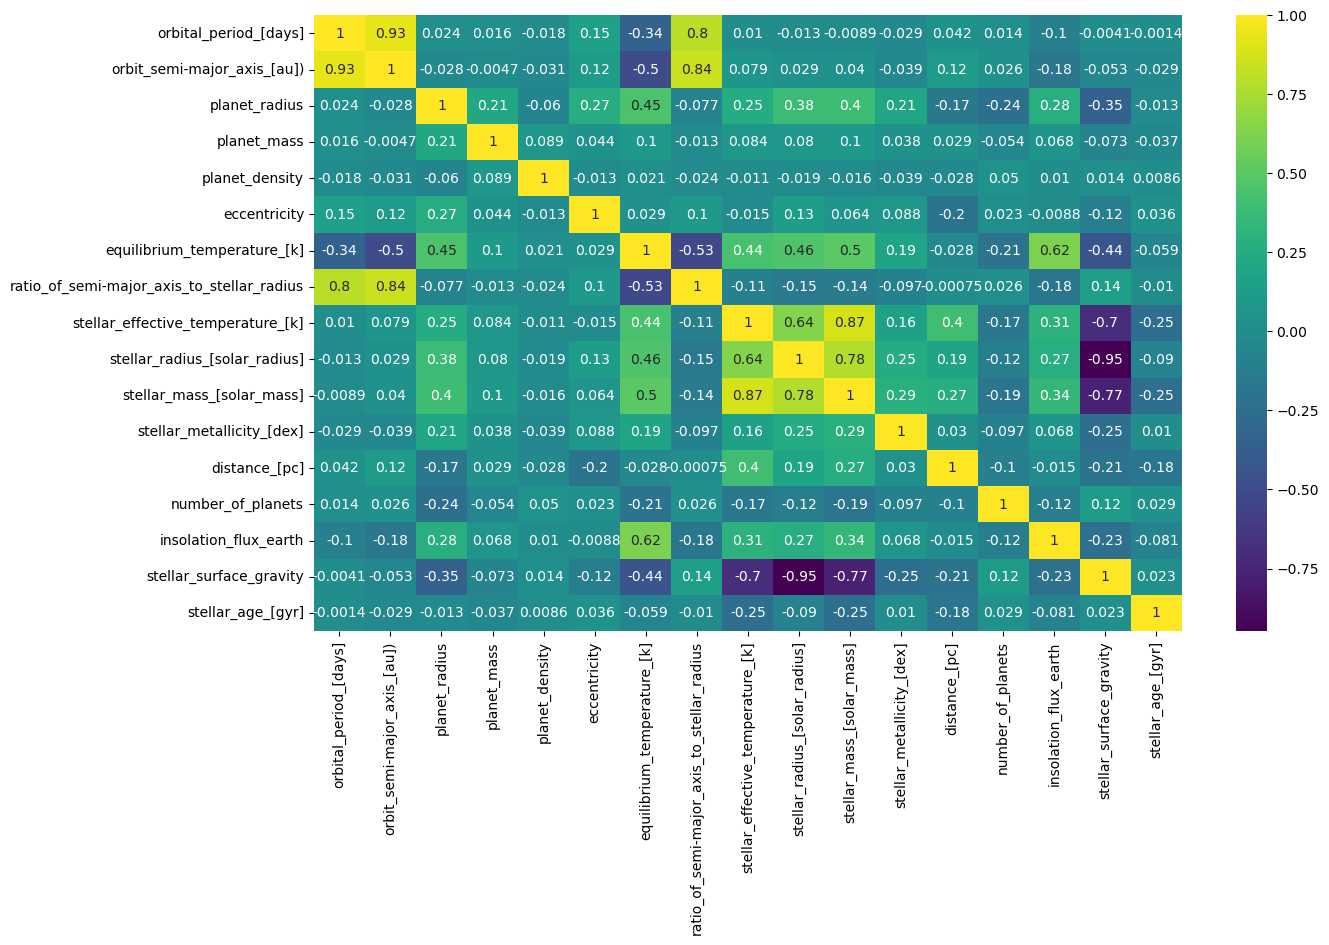

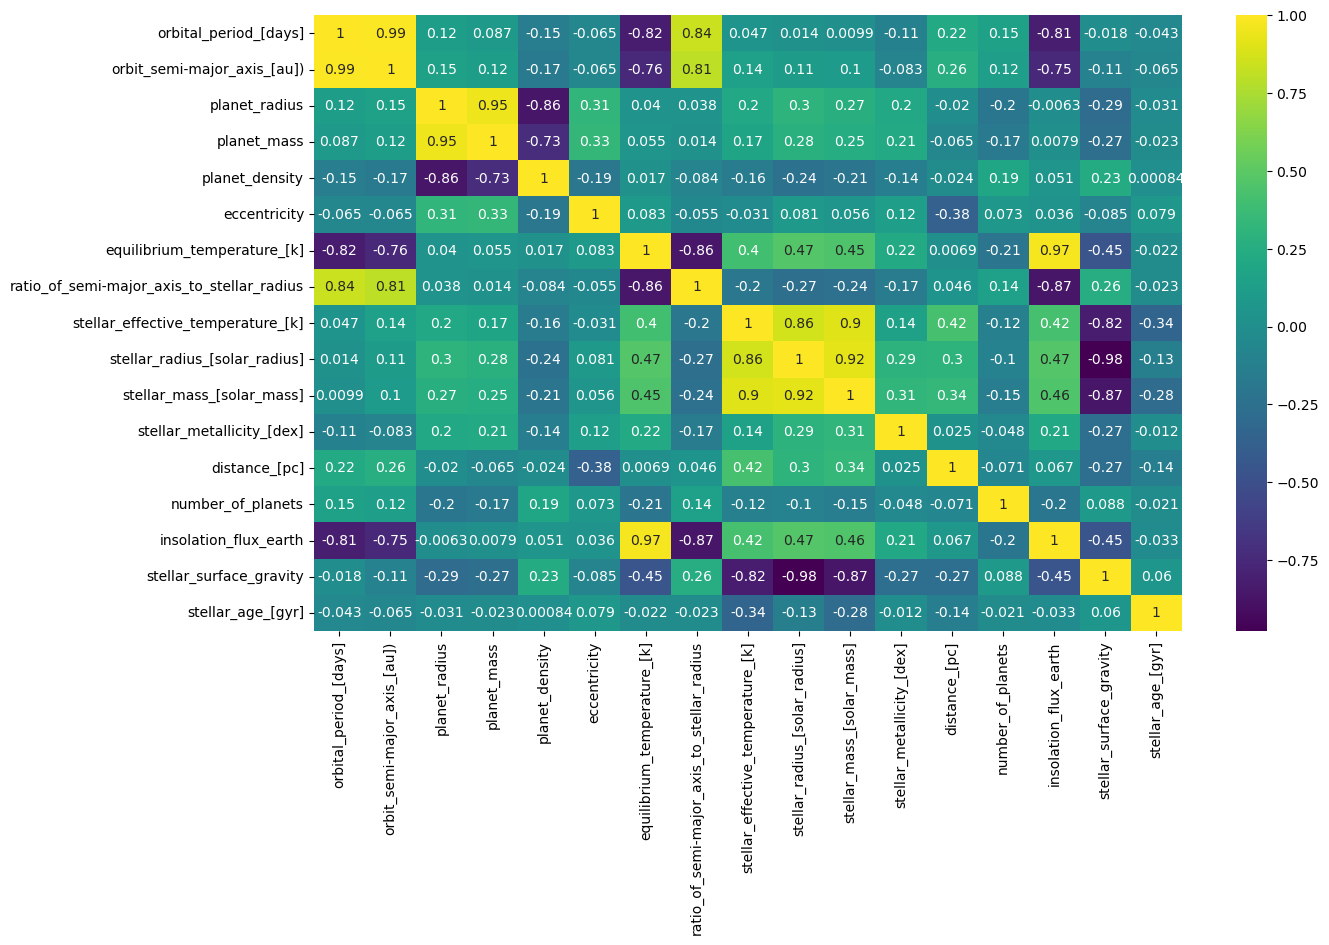

In [313]:
plt.figure(figsize=(14, 8))
sns.heatmap(exo_join2.corr(), annot=True, cmap='viridis')
plt.show()

# ahora queremos hacer lo mismo otra vez, pero con spearman metodo
plt.figure(figsize=(14, 8))
sns.heatmap(exo_join2.corr(method='spearman'), annot=True, cmap='viridis')
plt.show()

In [306]:
exo_join2.to_csv('exo_join_correlaciones.csv')

In [307]:
backup_exojoin_correlaciones = exo_join2.copy()

In [308]:
backup_exojoin_correlaciones.to_csv('backup_exojoin_correlaciones.csv')

In [5]:
exo_join = pd.read_csv('exoplanets.csv')

PREPARE DATA FOR MACHINE LEARNING AUTOFILL NULLS

In [6]:
todo_con_espacio = exo_join.copy()

In [7]:
todo_con_nulos = todo_con_espacio.replace(' ', np.nan,)

In [8]:
todo_con_nulos.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5265 entries, 0 to 5264
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Unnamed: 0                                  5265 non-null   int64 
 1   planet_name                                 5265 non-null   object
 2   host_name                                   5265 non-null   object
 3   orbital_period_[days]                       5050 non-null   object
 4   orbit_semi-major_axis_[au])                 4982 non-null   object
 5   planet_radius                               5248 non-null   object
 6   planet_mass                                 5245 non-null   object
 7   planet_density                              5153 non-null   object
 8   eccentricity                                4560 non-null   object
 9   equilibrium_temperature_[k]                 3882 non-null   object
 10  ratio_of_semi-major_axis

In [9]:
todo_con_nulos['nulltest'] = todo_con_nulos['planet_density'].str[:8]
algo  = todo_con_nulos[todo_con_nulos['nulltest'].isnull()]
len(algo)

112

In [10]:
todo_con_nulos = todo_con_nulos.drop(columns=['nulltest', 'stellar_metallicity_[dex]', 'distance_[pc]', 'planet_name', 'host_name', 'number_of_planets'])

In [70]:
todo_con_nulos

,planet_name,host_name,orbital_period_[days],orbit_semi-major_axis_[au]),planet_radius,planet_mass,planet_density,eccentricity,equilibrium_temperature_[k],ratio_of_semi-major_axis_to_stellar_radius,stellar_effective_temperature_[k],stellar_radius_[solar_radius],stellar_mass_[solar_mass],stellar_metallicity_[dex],distance_[pc],number_of_planets,insolation_flux_earth,stellar_surface_gravity,stellar_age_[gyr]
0,11 Com b,11 Com,326.03000000,1.290000,12.100,6165.60000,19.100000,0.231000,NaN,NaN,4742.00,19.00,2.70,-0.350,93.1846000,1,NaN,2.31,NaN
1,11 UMi b,11 UMi,516.21997000,1.530000,12.300,4684.81420,13.800000,0.080000,NaN,NaN,4213.00,29.79,2.78,-0.020,125.3210000,1,NaN,1.93,1.560
2,14 And b,14 And,185.84000000,0.830000,12.900,1525.50000,3.900000,0.000000,NaN,NaN,4813.00,11.00,2.20,-0.240,75.4392000,1,NaN,2.63,4.500
3,14 Her b,14 Her,1765.03890112,2.773069,12.600,2586.74645,7.110000,0.372689,NaN,NaN,5338.00,0.93,0.91,0.405,17.9323000,2,NaN,4.45,3.900
4,16 Cyg B b,16 Cyg B,798.50000000,1.660000,13.500,565.73740,1.260000,0.680000,NaN,NaN,5750.00,1.13,1.08,0.060,21.1397000,1,NaN,4.36,7.400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5260,Kepler-228 d,Kepler-228,11.09428600,0.101000,4.040,15.40000,1.280000,0.000000,835,10.900,6043.00,1.01,0.95,-0.030,1644.6100000,3,122.78,4.47,0.300
5261,Kepler-229 b,Kepler-229,6.25297200,0.062000,2.200,5.48000,2.830000,0.000000,823,18.940,5120.00,0.73,0.80,0.160,826.2650000,3,76.22,4.63,1.100
5262,Kepler-229 c,Kepler-229,16.06863800,0.117000,4.920,21.50000,0.992000,0.000000,600,36.850,5120.00,0.73,0.80,0.160,826.2650000,3,21.64,4.63,1.100
5263,Kepler-229 d,Kepler-229,41.19491200,0.220000,3.850,14.20000,1.370000,0.000000,439,70.750,5120.00,0.73,0.80,0.160,826.2650000,3,6.16,4.63,1.100


In [13]:
# cambiamos los valores nulos en la columna eccentricity por ceros
todo_con_nulos['eccentricity'] = todo_con_nulos['eccentricity'].replace(np.nan, 0)

In [15]:
#cahnge all types to float
for i in todo_con_nulos.columns:
    todo_con_nulos[i] = todo_con_nulos[i].astype(float)
    

In [74]:
todo_con_nulos.eccentricity.value_counts()

0.0000    3571
0.0700      43
0.0400      35
0.0600      35
0.1100      34
          ... 
0.2380       1
0.7441       1
0.0666       1
0.0985       1
0.0330       1
Name: eccentricity, Length: 605, dtype: int64

In [41]:
complete_data = exo_join.copy()

In [20]:
complete_data.eccentricity = todo_con_nulos.eccentricity

In [21]:
complete_data['ratio_of_semi-major_axis_to_stellar_radius'] = todo_con_nulos['ratio_of_semi-major_axis_to_stellar_radius']

In [42]:
complete_data

,Unnamed: 0,planet_name,host_name,orbital_period_[days],orbit_semi-major_axis_[au]),planet_radius,planet_mass,planet_density,eccentricity,equilibrium_temperature_[k],ratio_of_semi-major_axis_to_stellar_radius,stellar_effective_temperature_[k],stellar_radius_[solar_radius],stellar_mass_[solar_mass],stellar_metallicity_[dex],distance_[pc],number_of_planets,insolation_flux_earth,stellar_surface_gravity,stellar_age_[gyr]
0,0,11 Com b,11 Com,326.03000000,1.290000,12.100,6165.60000,19.100000,0.231000,,,4742.00,19.00,2.70,-0.350,93.1846000,1,,2.31,
1,1,11 UMi b,11 UMi,516.21997000,1.530000,12.300,4684.81420,13.800000,0.080000,,,4213.00,29.79,2.78,-0.020,125.3210000,1,,1.93,1.560
2,2,14 And b,14 And,185.84000000,0.830000,12.900,1525.50000,3.900000,0.000000,,,4813.00,11.00,2.20,-0.240,75.4392000,1,,2.63,4.500
3,3,14 Her b,14 Her,1765.03890112,2.773069,12.600,2586.74645,7.110000,0.372689,,,5338.00,0.93,0.91,0.405,17.9323000,2,,4.45,3.900
4,4,16 Cyg B b,16 Cyg B,798.50000000,1.660000,13.500,565.73740,1.260000,0.680000,,,5750.00,1.13,1.08,0.060,21.1397000,1,,4.36,7.400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5260,5260,Kepler-228 d,Kepler-228,11.09428600,0.101000,4.040,15.40000,1.280000,0.000000,835,10.900000,6043.00,1.01,0.95,-0.030,1644.6100000,3,122.78,4.47,0.300
5261,5261,Kepler-229 b,Kepler-229,6.25297200,0.062000,2.200,5.48000,2.830000,0.000000,823,18.940000,5120.00,0.73,0.80,0.160,826.2650000,3,76.22,4.63,1.100
5262,5262,Kepler-229 c,Kepler-229,16.06863800,0.117000,4.920,21.50000,0.992000,0.000000,600,36.850000,5120.00,0.73,0.80,0.160,826.2650000,3,21.64,4.63,1.100
5263,5263,Kepler-229 d,Kepler-229,41.19491200,0.220000,3.850,14.20000,1.370000,0.000000,439,70.750000,5120.00,0.73,0.80,0.160,826.2650000,3,6.16,4.63,1.100


In [23]:
complete_data.to_csv('complete_data.csv')

In [65]:
#todo_con_nulos.drop(columns=['nulltest', 'eccentricity'])

In [46]:
ratio = todo_con_nulos[['stellar_radius_[solar_radius]', 'orbit_semi-major_axis_[au])']]

HHHHHHHHHHHHHHHHHHHHHHH

In [26]:
ratio['ratios'] = ratio['orbit_semi-major_axis_[au])'] / ratio['stellar_radius_[solar_radius]']

In [48]:
ratio['sunradius'] = ratio['stellar_radius_[solar_radius]'] * 0.00465047
ratio['realratio'] = ratio['orbit_semi-major_axis_[au])'] / ratio['sunradius']

In [49]:
ratio[0:65]

,stellar_radius_[solar_radius],orbit_semi-major_axis_[au]),sunradius,realratio
0,19.00,1.290000,0.088359,14.599543
1,29.79,1.530000,0.138538,11.043941
2,11.00,0.830000,0.051155,16.225144
3,0.93,2.773069,0.004325,641.181348
4,1.13,1.660000,0.005255,315.887759
...,...,...,...,...
60,0.90,0.780000,0.004185,186.361092
61,0.80,1662.000000,0.003720,446729.040291
62,0.80,2.060000,0.003720,553.707475
63,0.84,1.480000,0.003906,378.865956


In [54]:
# ahora vamos a transferar los valores de la columna realratio a la datframe todo_con_nulos pero solo donde los valores de la columna ratio_of_semi-major_axis_to_stellar_radius son nulos.
# primero, vamos a crear una lista de los indices donde los valores de la columna ratio_of_semi-major_axis_to_stellar_radius son nulos.
# luego, vamos a crear una lista de los valores de la columna realratio en los indices donde los valores de la columna ratio_of_semi-major_axis_to_stellar_radius son nulos.
todo_con_nulos['nulltest'] = todo_con_nulos['ratio_of_semi-major_axis_to_stellar_radius']
algo  = todo_con_nulos[todo_con_nulos['nulltest'].isnull()]
print(len(algo))
indices = algo.index
indices

272


Int64Index([  12,   74,   76,   77,  113,  118,  131,  133,  134,  142,
            ...
            3161, 3405, 3438, 3442, 3443, 3476, 3518, 3949, 5073, 5074],
           dtype='int64', length=272)

In [31]:
ratio_test = todo_con_nulos2.copy()

In [51]:
# ahora vamos a crear una lista de los valores de la columna realratio en los indices donde los valores de la columna ratio_of_semi-major_axis_to_stellar_radius son nulos.
valores = ratio['realratio'][indices]

In [52]:
valores

12     NaN
74     NaN
76     NaN
77     NaN
113    NaN
        ..
3476   NaN
3518   NaN
3949   NaN
5073   NaN
5074   NaN
Name: realratio, Length: 272, dtype: float64

In [35]:
ratio_test['ratio_of_semi-major_axis_to_stellar_radius'][40:57]

40       10.229679
41       48.870916
42       13.683856
43     6821.455245
44    55908.327545
45     1374.484730
46       19.100000
47       31.700000
48        8.640000
49      195.029050
50       13.838933
51        7.884508
52        3.179156
53        8.820702
54       16.158476
55       55.800000
56      220.341462
Name: ratio_of_semi-major_axis_to_stellar_radius, dtype: float64

In [36]:
todo_con_nulos['ratio_of_semi-major_axis_to_stellar_radius'] = ratio_test['ratio_of_semi-major_axis_to_stellar_radius']

In [37]:
todo_con_nulos.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5265 entries, 0 to 5264
Data columns (total 16 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Unnamed: 0                                  5265 non-null   float64
 1   orbital_period_[days]                       5050 non-null   float64
 2   orbit_semi-major_axis_[au])                 4982 non-null   float64
 3   planet_radius                               5248 non-null   float64
 4   planet_mass                                 5245 non-null   float64
 5   planet_density                              5153 non-null   float64
 6   eccentricity                                5265 non-null   float64
 7   equilibrium_temperature_[k]                 3882 non-null   float64
 8   ratio_of_semi-major_axis_to_stellar_radius  4993 non-null   float64
 9   stellar_effective_temperature_[k]           5081 non-null   float64
 10  stellar_radi

In [38]:
todo_con_nulos = todo_con_nulos.drop(columns=['nulltest'])

In [39]:
todo_con_nulos = todo_con_nulos.drop(columns=['eccentricity'])

In [40]:
todo_con_nulos.head()

,Unnamed: 0,orbital_period_[days],orbit_semi-major_axis_[au]),planet_radius,planet_mass,planet_density,equilibrium_temperature_[k],ratio_of_semi-major_axis_to_stellar_radius,stellar_effective_temperature_[k],stellar_radius_[solar_radius],stellar_mass_[solar_mass],insolation_flux_earth,stellar_surface_gravity,stellar_age_[gyr]
0,0.0,326.030000,1.290000,12.1,6165.60000,19.10,NaN,14.599543,4742.0,19.00,2.70,NaN,2.31,NaN
1,1.0,516.219970,1.530000,12.3,4684.81420,13.80,NaN,11.043941,4213.0,29.79,2.78,NaN,1.93,1.56
2,2.0,185.840000,0.830000,12.9,1525.50000,3.90,NaN,16.225144,4813.0,11.00,2.20,NaN,2.63,4.50
3,3.0,1765.038901,2.773069,12.6,2586.74645,7.11,NaN,641.181348,5338.0,0.93,0.91,NaN,4.45,3.90
4,4.0,798.500000,1.660000,13.5,565.73740,1.26,NaN,315.887759,5750.0,1.13,1.08,NaN,4.36,7.40


In [110]:
#la cosa lo que queremos hacer es rellenar los valores nulos de la columna orbital_period_[days] con machine learning. por eso vamos a crear un dataframe con los valores de esa columna y los valores de la columna orbit_semi-major_axis_[au]), equilibrium_temperature_[K] y insolaton_flux_[earth_flux] que son las columnas que mas correlacion tienen con la columna orbital_period_[days].

In [217]:
orbit_period = todo_con_nulos2[['orbit_semi-major_axis_[au])', 'equilibrium_temperature_[k]', 'insolation_flux_earth', 'orbital_period_[days]']]
orbit_period

,orbit_semi-major_axis_[au]),equilibrium_temperature_[k],insolation_flux_earth,orbital_period_[days]
0,1.290000,,,326.030000
1,1.530000,,,516.219970
2,0.830000,,,185.840000
3,2.773069,,,1765.038901
4,1.660000,,,798.500000
...,...,...,...,...
5260,0.101000,835,122.78,11.094286
5261,0.062000,823,76.22,6.252972
5262,0.117000,600,21.64,16.068638
5263,0.220000,439,6.16,41.194912


In [218]:
# ahora vamos a crear un dataframe con los valores de la columna orbital_period_[days] que no son nulos
orbit_period_notnull = orbit_period[orbit_period['orbital_period_[days]'].notnull()]


In [219]:
orbit_period_notnull

,orbit_semi-major_axis_[au]),equilibrium_temperature_[k],insolation_flux_earth,orbital_period_[days]
0,1.290000,,,326.030000
1,1.530000,,,516.219970
2,0.830000,,,185.840000
3,2.773069,,,1765.038901
4,1.660000,,,798.500000
...,...,...,...,...
5260,0.101000,835,122.78,11.094286
5261,0.062000,823,76.22,6.252972
5262,0.117000,600,21.64,16.068638
5263,0.220000,439,6.16,41.194912


In [220]:
# ahora vamos a crear un dataframe con los valores de la columna orbital_period_[days] que son nulos
orbit_period_notnull = orbit_period[orbit_period['orbital_period_[days]'].notnull()]
orbit_period_null = orbit_period[orbit_period['orbital_period_[days]'].isnull()]
orbit_period_notnull_onlyvalue = orbit_period_notnull.dropna()

In [221]:
orbit_period_notnull.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5261 entries, 0 to 5264
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   orbit_semi-major_axis_[au])  5076 non-null   float64
 1   equilibrium_temperature_[k]  5261 non-null   object 
 2   insolation_flux_earth        5261 non-null   object 
 3   orbital_period_[days]        5261 non-null   float64
dtypes: float64(2), object(2)
memory usage: 744.0 KB


In [222]:
#para hacer el machine learning, vamos a tomar solamente las filas que tienen valores en todas las columnas
orbit_period_notnull_onlyvalue = orbit_period_notnull.dropna()

In [223]:
orbit_period_notnull_onlyvalue

,orbit_semi-major_axis_[au]),equilibrium_temperature_[k],insolation_flux_earth,orbital_period_[days]
0,1.290000,,,326.030000
1,1.530000,,,516.219970
2,0.830000,,,185.840000
3,2.773069,,,1765.038901
4,1.660000,,,798.500000
...,...,...,...,...
5260,0.101000,835,122.78,11.094286
5261,0.062000,823,76.22,6.252972
5262,0.117000,600,21.64,16.068638
5263,0.220000,439,6.16,41.194912


In [224]:
orbit_period_notnull_onlyvalue.to_csv('orbitalperiod_AI_onlyv.csv')

In [225]:
orbit_period_notnull_onlyvalue.to_csv('orbitalperiod_AI_onlyv.csv')
orbit_period_null.to_csv('orbitalperiod_AI_prediction.csv')

CHECK UPDATE

In [55]:
exoplanets = pd.read_csv('exoplanets.csv')

In [56]:
complete_data2 = pd.read_csv('complete_data.csv')

In [64]:
exoplanets

,Unnamed: 0,planet_name,host_name,orbital_period_[days],orbit_semi-major_axis_[au]),planet_radius,planet_mass,planet_density,eccentricity,equilibrium_temperature_[k],ratio_of_semi-major_axis_to_stellar_radius,stellar_effective_temperature_[k],stellar_radius_[solar_radius],stellar_mass_[solar_mass],stellar_metallicity_[dex],distance_[pc],number_of_planets,insolation_flux_earth,stellar_surface_gravity,stellar_age_[gyr]
0,0,11 Com b,11 Com,326.03000000,1.290000,12.100,6165.60000,19.100000,0.231000,,,4742.00,19.00,2.70,-0.350,93.1846000,1,,2.31,
1,1,11 UMi b,11 UMi,516.21997000,1.530000,12.300,4684.81420,13.800000,0.080000,,,4213.00,29.79,2.78,-0.020,125.3210000,1,,1.93,1.560
2,2,14 And b,14 And,185.84000000,0.830000,12.900,1525.50000,3.900000,0.000000,,,4813.00,11.00,2.20,-0.240,75.4392000,1,,2.63,4.500
3,3,14 Her b,14 Her,1765.03890112,2.773069,12.600,2586.74645,7.110000,0.372689,,,5338.00,0.93,0.91,0.405,17.9323000,2,,4.45,3.900
4,4,16 Cyg B b,16 Cyg B,798.50000000,1.660000,13.500,565.73740,1.260000,0.680000,,,5750.00,1.13,1.08,0.060,21.1397000,1,,4.36,7.400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5260,5260,Kepler-228 d,Kepler-228,11.09428600,0.101000,4.040,15.40000,1.280000,0.000000,835,10.900000,6043.00,1.01,0.95,-0.030,1644.6100000,3,122.78,4.47,0.300
5261,5261,Kepler-229 b,Kepler-229,6.25297200,0.062000,2.200,5.48000,2.830000,0.000000,823,18.940000,5120.00,0.73,0.80,0.160,826.2650000,3,76.22,4.63,1.100
5262,5262,Kepler-229 c,Kepler-229,16.06863800,0.117000,4.920,21.50000,0.992000,0.000000,600,36.850000,5120.00,0.73,0.80,0.160,826.2650000,3,21.64,4.63,1.100
5263,5263,Kepler-229 d,Kepler-229,41.19491200,0.220000,3.850,14.20000,1.370000,0.000000,439,70.750000,5120.00,0.73,0.80,0.160,826.2650000,3,6.16,4.63,1.100


In [59]:
complete_data2.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)

In [66]:
todo_con_nulos = complete_data2.replace(' ', np.nan,)

In [67]:
todo_con_nulos.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5265 entries, 0 to 5264
Data columns (total 19 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   planet_name                                 5265 non-null   object 
 1   host_name                                   5265 non-null   object 
 2   orbital_period_[days]                       5050 non-null   object 
 3   orbit_semi-major_axis_[au])                 4982 non-null   object 
 4   planet_radius                               5248 non-null   object 
 5   planet_mass                                 5245 non-null   object 
 6   planet_density                              5153 non-null   object 
 7   eccentricity                                5265 non-null   float64
 8   equilibrium_temperature_[k]                 3882 non-null   object 
 9   ratio_of_semi-major_axis_to_stellar_radius  3848 non-null   float64
 10  stellar_effe

In [68]:
todo_con_nulos2 = todo_con_nulos.drop(columns=['stellar_metallicity_[dex]', 'distance_[pc]', 'planet_name', 'host_name', 'number_of_planets'])

In [71]:
for i in todo_con_nulos2.columns:
    todo_con_nulos2[i] = todo_con_nulos2[i].astype(float)

In [80]:
complete_data2['ratio_of_semi-major_axis_to_stellar_radius'].value_counts()

14.100000    8
28.000000    8
7.800000     8
10.700000    7
12.800000    6
            ..
9.377576     1
36.240000    1
18.760000    1
32.150000    1
10.643000    1
Name: ratio_of_semi-major_axis_to_stellar_radius, Length: 2814, dtype: int64

In [82]:
todo_con_nulos2['nulltest'] = todo_con_nulos2['ratio_of_semi-major_axis_to_stellar_radius']
algo  = todo_con_nulos2[todo_con_nulos2['nulltest'].isnull()]
print(len(algo))

1417


In [83]:
ratio = todo_con_nulos2[['stellar_radius_[solar_radius]', 'orbit_semi-major_axis_[au])']]

In [84]:
ratio

,stellar_radius_[solar_radius],orbit_semi-major_axis_[au])
0,19.00,1.290000
1,29.79,1.530000
2,11.00,0.830000
3,0.93,2.773069
4,1.13,1.660000
...,...,...
5260,1.01,0.101000
5261,0.73,0.062000
5262,0.73,0.117000
5263,0.73,0.220000


In [85]:
ratio['sunradius'] = ratio['stellar_radius_[solar_radius]'] * 0.00465047
ratio['realratio'] = ratio['orbit_semi-major_axis_[au])'] / ratio['sunradius']

In [86]:
ratio

,stellar_radius_[solar_radius],orbit_semi-major_axis_[au]),sunradius,realratio
0,19.00,1.290000,0.088359,14.599543
1,29.79,1.530000,0.138538,11.043941
2,11.00,0.830000,0.051155,16.225144
3,0.93,2.773069,0.004325,641.181348
4,1.13,1.660000,0.005255,315.887759
...,...,...,...,...
5260,1.01,0.101000,0.004697,21.503203
5261,0.73,0.062000,0.003395,18.262994
5262,0.73,0.117000,0.003395,34.464038
5263,0.73,0.220000,0.003395,64.804173


In [87]:
todo_con_nulos2['nulltest'] = todo_con_nulos2['ratio_of_semi-major_axis_to_stellar_radius']
algo  = todo_con_nulos2[todo_con_nulos2['nulltest'].isnull()]
print(len(algo))
indices = algo.index

1417


In [89]:
valores = ratio['realratio'][indices]
len(valores)

1417

In [90]:
ratio_test = todo_con_nulos2.copy()

In [91]:
ratio_test['ratio_of_semi-major_axis_to_stellar_radius'][indices] = valores

In [97]:
ratio_test['ratio_of_semi-major_axis_to_stellar_radius']

460     75.011173
461     26.223418
462     13.111709
463     10.647217
464     39.634213
465           NaN
466    104.120772
467    912.542173
468      3.953000
469     61.088645
470     14.669308
471      9.526735
472    316.736367
473    125.865414
474     75.551794
Name: ratio_of_semi-major_axis_to_stellar_radius, dtype: float64

In [98]:
ratio_test['nulltest'] = ratio_test['ratio_of_semi-major_axis_to_stellar_radius']
algo  = ratio_test[ratio_test['nulltest'].isnull()]
print(len(algo))

272


In [99]:
todo_con_nulos2['ratio_of_semi-major_axis_to_stellar_radius'] = ratio_test['ratio_of_semi-major_axis_to_stellar_radius']

In [101]:
todo_con_nulos2.drop(columns=['nulltest'], inplace=True)

In [104]:
complete_data.drop(columns=['Unnamed: 0'], inplace=True)

In [106]:
complete_data['ratio_of_semi-major_axis_to_stellar_radius'] = todo_con_nulos2['ratio_of_semi-major_axis_to_stellar_radius']

In [109]:
complete_data.to_csv('complete_data_with_ecc_and_ratiohalf.csv')

MACHINE LEARNING PREPARATION

In [308]:
todo_con_nulos2 = pd.read_csv('nextdata.csv')

In [309]:
todo_con_nulos2.drop(columns=['planet_name','host_name', 'number_of_planets'], inplace=True)

In [310]:
todo_con_nulos2

,Unnamed: 0,orbital_period_[days],orbit_semi-major_axis_[au]),planet_radius,planet_mass,planet_density,eccentricity,equilibrium_temperature_[k],ratio_of_semi-major_axis_to_stellar_radius,stellar_effective_temperature_[k],stellar_radius_[solar_radius],stellar_mass_[solar_mass],stellar_metallicity_[dex],distance_[pc],insolation_flux_earth,stellar_surface_gravity,stellar_age_[gyr]
0,0,326.030000,1.290000,12.10,6165.60000,19.100000,0.231000,313.321965,14.599543,4742.0,19.00,2.70,-0.350,93.1846000,31379.795326,2.31,0.194501
1,1,516.219970,1.530000,12.30,4684.81420,13.800000,0.080000,313.321965,11.043941,4213.0,29.79,2.78,-0.020,125.3210000,31379.795326,1.93,1.560000
2,2,185.840000,0.830000,12.90,1525.50000,3.900000,0.000000,313.321965,16.225144,4813.0,11.00,2.20,-0.240,75.4392000,31379.795326,2.63,4.500000
3,3,1765.038901,2.773069,12.60,2586.74645,7.110000,0.372689,308.484799,641.181348,5338.0,0.93,0.91,0.405,17.9323000,29290.077908,4.45,3.900000
4,4,798.500000,1.660000,13.50,565.73740,1.260000,0.680000,311.602502,315.887759,5750.0,1.13,1.08,0.060,21.1397000,29306.735908,4.36,7.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5260,5260,11.094286,0.101000,4.04,15.40000,1.280000,0.000000,835.000000,10.900000,6043.0,1.01,0.95,-0.030,1644.6100000,122.780000,4.47,0.300000
5261,5261,6.252972,0.062000,2.20,5.48000,2.830000,0.000000,823.000000,18.940000,5120.0,0.73,0.80,0.160,826.2650000,76.220000,4.63,1.100000
5262,5262,16.068638,0.117000,4.92,21.50000,0.992000,0.000000,600.000000,36.850000,5120.0,0.73,0.80,0.160,826.2650000,21.640000,4.63,1.100000
5263,5263,41.194912,0.220000,3.85,14.20000,1.370000,0.000000,439.000000,70.750000,5120.0,0.73,0.80,0.160,826.2650000,6.160000,4.63,1.100000


In [311]:
todo_con_nulos2 = todo_con_nulos2.replace(' ', np.nan,)

In [312]:
for i in todo_con_nulos2.columns:
    todo_con_nulos2[i] = todo_con_nulos2[i].astype(float)

In [313]:
todo_con_nulos2.drop(columns=['Unnamed: 0'], inplace=True)

In [177]:
osma = todo_con_nulos2[['orbital_period_[days]', 'equilibrium_temperature_[k]', 'orbit_semi-major_axis_[au])']]

In [178]:
osma.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5265 entries, 0 to 5264
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   orbital_period_[days]        5261 non-null   float64
 1   equilibrium_temperature_[k]  3882 non-null   float64
 2   orbit_semi-major_axis_[au])  4982 non-null   float64
dtypes: float64(3)
memory usage: 123.5 KB


In [179]:
osma_notnull = osma[osma['orbit_semi-major_axis_[au])'].notnull()]
osma_null = osma[osma['orbit_semi-major_axis_[au])'].isnull()]
osma_notnull_onlyvalue = osma_notnull.dropna()

In [180]:
osma_notnull.head(10)

,orbital_period_[days],equilibrium_temperature_[k],orbit_semi-major_axis_[au])
0,326.030000,NaN,1.290000
1,516.219970,NaN,1.530000
2,185.840000,NaN,0.830000
3,1765.038901,NaN,2.773069
4,798.500000,NaN,1.660000
5,578.380000,NaN,1.450000
6,993.300000,NaN,2.600000
7,3165.079609,1700.0,330.000000
8,30.350600,NaN,0.190000
9,452.800000,NaN,1.333000


In [181]:
osma_null

,orbital_period_[days],equilibrium_temperature_[k],orbit_semi-major_axis_[au])
77,8.989100,NaN,NaN
113,8.966000,NaN,NaN
127,8.138268,850.0,NaN
129,28.165600,NaN,NaN
130,0.720910,NaN,NaN
...,...,...,...
3518,3000.000000,NaN,NaN
3949,122.400000,NaN,NaN
4827,11.280000,NaN,NaN
5073,28.731000,NaN,NaN


In [182]:
osma_notnull_onlyvalue = osma_notnull.dropna()

In [183]:
osma_notnull_onlyvalue

,orbital_period_[days],equilibrium_temperature_[k],orbit_semi-major_axis_[au])
7,3165.079609,1700.0,330.000
11,3165.079609,1450.0,118.000
13,3165.079609,1600.0,52.000
16,3165.079609,1250.0,55.000
25,11688.000000,700.0,13.200
...,...,...,...
5260,11.094286,835.0,0.101
5261,6.252972,823.0,0.062
5262,16.068638,600.0,0.117
5263,41.194912,439.0,0.220


In [184]:
osma_notnull_onlyvalue.to_csv('orbit_semi-major_axis_[au])_AI_onlyv.csv')
osma_null.to_csv('orbit_semi-major_axis_[au])_AI_prediction.csv')

In [232]:
planetradius = todo_con_nulos2[['planet_radius', 'planet_mass', 'planet_density']]

In [233]:
planetradius_notnull = planetradius[planetradius['planet_radius'].notnull()]
planetradius_null = planetradius[planetradius['planet_radius'].isnull()]
planetradius_notnull_onlyvalue = planetradius_notnull.dropna()

In [234]:
planetradius_notnull

,planet_radius,planet_mass,planet_density
0,12.10,6165.60000,19.100
1,12.30,4684.81420,13.800
2,12.90,1525.50000,3.900
3,12.60,2586.74645,7.110
4,13.50,565.73740,1.260
...,...,...,...
5260,4.04,15.40000,1.280
5261,2.20,5.48000,2.830
5262,4.92,21.50000,0.992
5263,3.85,14.20000,1.370


In [235]:
planetradius_null

,planet_radius,planet_mass,planet_density
1837,NaN,NaN,NaN
1838,NaN,NaN,NaN
2834,NaN,NaN,NaN
2835,NaN,NaN,NaN
2836,NaN,NaN,NaN


In [236]:
planetradius_notnull_onlyvalue

,planet_radius,planet_mass,planet_density
0,12.10,6165.60000,19.100
1,12.30,4684.81420,13.800
2,12.90,1525.50000,3.900
3,12.60,2586.74645,7.110
4,13.50,565.73740,1.260
...,...,...,...
5259,2.70,7.75000,2.160
5260,4.04,15.40000,1.280
5261,2.20,5.48000,2.830
5262,4.92,21.50000,0.992


In [237]:
planetradius_notnull_onlyvalue.to_csv('planet_radius_AI_onlyv.csv')
planetradius_null.to_csv('planet_radius_AI_prediction.csv')

In [238]:
planetmass = todo_con_nulos2[['planet_mass', 'planet_radius', 'planet_density']]
planetmass_notnull = planetmass[planetmass['planet_mass'].notnull()]
planetmass_null = planetmass[planetmass['planet_mass'].isnull()]
planetmass_notnull_onlyvalue = planetmass_notnull.dropna()


In [239]:
planetmass_notnull

,planet_mass,planet_radius,planet_density
0,6165.60000,12.10,19.100
1,4684.81420,12.30,13.800
2,1525.50000,12.90,3.900
3,2586.74645,12.60,7.110
4,565.73740,13.50,1.260
...,...,...,...
5260,15.40000,4.04,1.280
5261,5.48000,2.20,2.830
5262,21.50000,4.92,0.992
5263,14.20000,3.85,1.370


In [240]:
planetmass_null

,planet_mass,planet_radius,planet_density
1837,NaN,NaN,NaN
1838,NaN,NaN,NaN
2834,NaN,NaN,NaN
2835,NaN,NaN,NaN
2836,NaN,NaN,NaN


In [241]:
planetmass_notnull_onlyvalue

,planet_mass,planet_radius,planet_density
0,6165.60000,12.10,19.100
1,4684.81420,12.30,13.800
2,1525.50000,12.90,3.900
3,2586.74645,12.60,7.110
4,565.73740,13.50,1.260
...,...,...,...
5259,7.75000,2.70,2.160
5260,15.40000,4.04,1.280
5261,5.48000,2.20,2.830
5262,21.50000,4.92,0.992


In [242]:
planetmass_notnull_onlyvalue.to_csv('planet_mass_AI_onlyv.csv')
planetmass_null.to_csv('planet_mass_AI_prediction.csv')

In [137]:
planetdensity = todo_con_nulos2[['planet_density', 'planet_radius', 'planet_mass']]
planetdensity_notnull = planetdensity[planetdensity['planet_density'].notnull()]
planetdensity_null = planetdensity[planetdensity['planet_density'].isnull()]
planetdensity_notnull_onlyvalue = planetdensity_notnull.dropna()

In [138]:
planetdensity_notnull

,planet_density,planet_radius,planet_mass
0,19.100,12.10,6165.60000
1,13.800,12.30,4684.81420
2,3.900,12.90,1525.50000
3,7.110,12.60,2586.74645
4,1.260,13.50,565.73740
...,...,...,...
5259,2.160,2.70,7.75000
5260,1.280,4.04,15.40000
5261,2.830,2.20,5.48000
5262,0.992,4.92,21.50000


In [139]:
planetdensity_null

,planet_density,planet_radius,planet_mass
127,NaN,5.700,413.17900
166,NaN,12.442,4131.79000
173,NaN,2.025,11.70000
687,NaN,NaN,1366.66215
688,NaN,NaN,1398.44499
...,...,...,...
4690,NaN,NaN,100.00000
4828,NaN,9.960,1462.01067
5177,NaN,0.865,3.08000
5178,NaN,1.003,14.30000


In [140]:
planetdensity_notnull_onlyvalue

,planet_density,planet_radius,planet_mass
0,19.100,12.10,6165.60000
1,13.800,12.30,4684.81420
2,3.900,12.90,1525.50000
3,7.110,12.60,2586.74645
4,1.260,13.50,565.73740
...,...,...,...
5259,2.160,2.70,7.75000
5260,1.280,4.04,15.40000
5261,2.830,2.20,5.48000
5262,0.992,4.92,21.50000


In [151]:
planetdensity_notnull_onlyvalue.to_csv('planet_density_AI_onlyv.csv')
planetdensity_null.to_csv('planet_density_AI_prediction.csv')

In [142]:
equilibrium_temperature = todo_con_nulos2[['equilibrium_temperature_[k]', 'orbital_period_[days]', 'orbit_semi-major_axis_[au])', 'stellar_radius_[solar_radius]', 'insolation_flux_earth']]

In [243]:
equilibrium_temperature = todo_con_nulos2[['equilibrium_temperature_[k]', 'orbital_period_[days]', 'orbit_semi-major_axis_[au])', 'stellar_radius_[solar_radius]', 'insolation_flux_earth']]
equilibrium_temperature_notnull = equilibrium_temperature[equilibrium_temperature['equilibrium_temperature_[k]'].notnull()]
equilibrium_temperature_null = equilibrium_temperature[equilibrium_temperature['equilibrium_temperature_[k]'].isnull()]
equilibrium_temperature_notnull_onlyvalue = equilibrium_temperature_notnull.dropna()

In [244]:
equilibrium_temperature_notnull

,equilibrium_temperature_[k],orbital_period_[days],orbit_semi-major_axis_[au]),stellar_radius_[solar_radius],insolation_flux_earth
7,1700.0,NaN,330.000,1.31,NaN
11,1450.0,NaN,118.000,0.84,NaN
13,1600.0,NaN,52.000,0.37,NaN
16,1250.0,NaN,55.000,0.22,NaN
25,700.0,11688.000000,13.200,1.49,NaN
...,...,...,...,...,...
5260,835.0,11.094286,0.101,1.01,122.78
5261,823.0,6.252972,0.062,0.73,76.22
5262,600.0,16.068638,0.117,0.73,21.64
5263,439.0,41.194912,0.220,0.73,6.16


In [245]:
equilibrium_temperature_null

,equilibrium_temperature_[k],orbital_period_[days],orbit_semi-major_axis_[au]),stellar_radius_[solar_radius],insolation_flux_earth
0,NaN,326.030000,1.290000,19.00,NaN
1,NaN,516.219970,1.530000,29.79,NaN
2,NaN,185.840000,0.830000,11.00,NaN
3,NaN,1765.038901,2.773069,0.93,NaN
4,NaN,798.500000,1.660000,1.13,NaN
...,...,...,...,...,...
4762,NaN,1919.000000,3.053000,1.10,NaN
4827,NaN,11.280000,NaN,1.26,NaN
4828,NaN,737.113100,1.640000,1.12,0.56
5073,NaN,28.731000,NaN,0.86,NaN


In [246]:
equilibrium_temperature_notnull_onlyvalue

,equilibrium_temperature_[k],orbital_period_[days],orbit_semi-major_axis_[au]),stellar_radius_[solar_radius],insolation_flux_earth
30,1958.0,0.736547,0.01544,0.94,2657.83
46,593.0,8.462999,0.06450,0.70,76.64
73,464.0,2.290700,0.01850,0.17,8.60
80,1898.0,1.508956,0.02752,1.11,2852.63
83,1442.0,2.828042,0.04016,1.12,661.13
...,...,...,...,...,...
5260,835.0,11.094286,0.10100,1.01,122.78
5261,823.0,6.252972,0.06200,0.73,76.22
5262,600.0,16.068638,0.11700,0.73,21.64
5263,439.0,41.194912,0.22000,0.73,6.16


In [247]:
equilibrium_temperature_notnull_onlyvalue.to_csv('equilibrium_temperature_[k]_AI_onlyv.csv')
equilibrium_temperature_null.to_csv('equilibrium_temperature_[k]_AI_prediction.csv')

In [260]:
todo_con_nulos2.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5265 entries, 0 to 5264
Data columns (total 16 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   orbital_period_[days]                       5261 non-null   float64
 1   orbit_semi-major_axis_[au])                 5076 non-null   float64
 2   planet_radius                               5260 non-null   float64
 3   planet_mass                                 5260 non-null   float64
 4   planet_density                              5234 non-null   float64
 5   eccentricity                                4560 non-null   float64
 6   equilibrium_temperature_[k]                 4867 non-null   float64
 7   ratio_of_semi-major_axis_to_stellar_radius  4993 non-null   float64
 8   stellar_effective_temperature_[k]           5081 non-null   float64
 9   stellar_radius_[solar_radius]               5061 non-null   float64
 10  stellar_mass

In [255]:
stellar_eff = todo_con_nulos2[['stellar_effective_temperature_[k]', 'stellar_radius_[solar_radius]', 'stellar_mass_[solar_mass]', 'stellar_surface_gravity']]
stellar_eff_notnull = stellar_eff[stellar_eff['stellar_effective_temperature_[k]'].notnull()]
stellar_eff_null = stellar_eff[stellar_eff['stellar_effective_temperature_[k]'].isnull()]
stellar_eff_notnull_onlyvalue = stellar_eff_notnull.dropna()

In [257]:
stellar_eff_notnull_onlyvalue

,stellar_effective_temperature_[k],stellar_radius_[solar_radius],stellar_mass_[solar_mass],stellar_surface_gravity
0,4742.0,19.00,2.70,2.31
1,4213.0,29.79,2.78,1.93
2,4813.0,11.00,2.20,2.63
3,5338.0,0.93,0.91,4.45
4,5750.0,1.13,1.08,4.36
...,...,...,...,...
5260,6043.0,1.01,0.95,4.47
5261,5120.0,0.73,0.80,4.63
5262,5120.0,0.73,0.80,4.63
5263,5120.0,0.73,0.80,4.63


In [258]:
stellar_eff_null

,stellar_effective_temperature_[k],stellar_radius_[solar_radius],stellar_mass_[solar_mass],stellar_surface_gravity
12,NaN,NaN,0.19,NaN
118,NaN,NaN,0.07,NaN
1162,NaN,NaN,5.50,NaN
1379,NaN,NaN,0.81,NaN
1643,NaN,1.18,1.24,NaN
...,...,...,...,...
2904,NaN,NaN,0.42,NaN
2905,NaN,NaN,0.37,NaN
2906,NaN,NaN,0.08,NaN
2908,NaN,NaN,0.48,NaN


In [259]:
stellar_eff_notnull_onlyvalue.to_csv('stellar_effective_temperature_[k]_AI_onlyv.csv')
stellar_eff_null.to_csv('stellar_effective_temperature_[k]_AI_prediction.csv')

In [268]:
stellar_radius = todo_con_nulos2[['stellar_effective_temperature_[k]', 'stellar_radius_[solar_radius]', 'stellar_mass_[solar_mass]', 'stellar_surface_gravity']]
stellar_radius_notnull = stellar_radius[stellar_radius['stellar_radius_[solar_radius]'].notnull()]
stellar_radius_null = stellar_radius[stellar_radius['stellar_radius_[solar_radius]'].isnull()]
stellar_radius_notnull_onlyvalue = stellar_radius_notnull.dropna()

In [269]:
stellar_radius_notnull_onlyvalue.to_csv('stellar_radius_[solar_radius]_AI_onlyv.csv')
stellar_radius_null.to_csv('stellar_radius_[solar_radius]_AI_prediction.csv')

In [276]:
stellar_mass = todo_con_nulos2[['stellar_effective_temperature_[k]', 'stellar_radius_[solar_radius]', 'stellar_mass_[solar_mass]', 'stellar_surface_gravity']]
stellar_mass_notnull = stellar_mass[stellar_mass['stellar_mass_[solar_mass]'].notnull()]
stellar_mass_null = stellar_mass[stellar_mass['stellar_mass_[solar_mass]'].isnull()]
stellar_mass_notnull_onlyvalue = stellar_mass_notnull.dropna()

In [277]:
stellar_radius_notnull_onlyvalue.to_csv('stellar_mass_[solar_mass]_AI_onlyv.csv')
stellar_radius_null.to_csv('stellar_mass_[solar_mass]_AI_prediction.csv')

In [285]:
insolation_flux = todo_con_nulos2[['insolation_flux_earth', 'equilibrium_temperature_[k]', 'orbital_period_[days]', 'orbit_semi-major_axis_[au])', 'stellar_radius_[solar_radius]']]
insolation_flux_notnull = insolation_flux[insolation_flux['insolation_flux_earth'].notnull()]
insolation_flux_null = insolation_flux[insolation_flux['insolation_flux_earth'].isnull()]
insolation_flux_notnull_onlyvalue = insolation_flux_notnull.dropna()


In [286]:
insolation_flux_notnull_onlyvalue.to_csv('insolation_flux_earth_AI_onlyv.csv')
insolation_flux_null.to_csv('insolation_flux_earth_AI_prediction.csv')

In [296]:
stellar_gravity = todo_con_nulos2[['stellar_surface_gravity', 'stellar_effective_temperature_[k]', 'stellar_radius_[solar_radius]', 'stellar_mass_[solar_mass]']]
stellar_gravity_notnull = stellar_gravity[stellar_gravity['stellar_surface_gravity'].notnull()]
stellar_gravity_null = stellar_gravity[stellar_gravity['stellar_surface_gravity'].isnull()]
stellar_gravity_notnull_onlyvalue = stellar_gravity_notnull.dropna()

In [297]:
stellar_eff_notnull_onlyvalue.to_csv('stellar_surface_gravity_AI_onlyv.csv')
stellar_eff_null.to_csv('stellar_surface_gravity_AI_prediction.csv')

In [305]:
todo_con_nulos2

,orbital_period_[days],orbit_semi-major_axis_[au]),planet_radius,planet_mass,planet_density,eccentricity,equilibrium_temperature_[k],ratio_of_semi-major_axis_to_stellar_radius,stellar_effective_temperature_[k],stellar_radius_[solar_radius],stellar_mass_[solar_mass],stellar_metallicity_[dex],distance_[pc],insolation_flux_earth,stellar_surface_gravity,stellar_age_[gyr]
0,326.030000,1.290000,12.10,6165.60000,19.100000,0.231000,313.321965,14.599543,4742.0,19.00,2.70,-0.350,93.1846,31379.795326,2.31,NaN
1,516.219970,1.530000,12.30,4684.81420,13.800000,0.080000,313.321965,11.043941,4213.0,29.79,2.78,-0.020,125.3210,31379.795326,1.93,1.56
2,185.840000,0.830000,12.90,1525.50000,3.900000,0.000000,313.321965,16.225144,4813.0,11.00,2.20,-0.240,75.4392,31379.795326,2.63,4.50
3,1765.038901,2.773069,12.60,2586.74645,7.110000,0.372689,308.484799,641.181348,5338.0,0.93,0.91,0.405,17.9323,29290.077908,4.45,3.90
4,798.500000,1.660000,13.50,565.73740,1.260000,0.680000,311.602502,315.887759,5750.0,1.13,1.08,0.060,21.1397,29306.735908,4.36,7.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5260,11.094286,0.101000,4.04,15.40000,1.280000,0.000000,835.000000,10.900000,6043.0,1.01,0.95,-0.030,1644.6100,122.780000,4.47,0.30
5261,6.252972,0.062000,2.20,5.48000,2.830000,0.000000,823.000000,18.940000,5120.0,0.73,0.80,0.160,826.2650,76.220000,4.63,1.10
5262,16.068638,0.117000,4.92,21.50000,0.992000,0.000000,600.000000,36.850000,5120.0,0.73,0.80,0.160,826.2650,21.640000,4.63,1.10
5263,41.194912,0.220000,3.85,14.20000,1.370000,0.000000,439.000000,70.750000,5120.0,0.73,0.80,0.160,826.2650,6.160000,4.63,1.10


In [306]:
stellar_age = todo_con_nulos2[['stellar_age_[gyr]', 'stellar_effective_temperature_[k]', 'stellar_mass_[solar_mass]']]
stellar_age_notnull = stellar_age[stellar_age['stellar_age_[gyr]'].notnull()]
stellar_age_null = stellar_age[stellar_age['stellar_age_[gyr]'].isnull()]
stellar_age_notnull_onlyvalue = stellar_age_notnull.dropna()

In [307]:
stellar_age_notnull_onlyvalue.to_csv('stellar_age_[gyr]_AI_onlyv.csv')
stellar_age_null.to_csv('stellar_age_[gyr]_AI_prediction.csv')

In [315]:
datawithml = pd.read_csv('nextdata.csv')

In [317]:
datawithml.drop('Unnamed: 0', axis=1, inplace=True)

In [319]:
datawithml.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5265 entries, 0 to 5264
Data columns (total 19 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   planet_name                                 5265 non-null   object 
 1   host_name                                   5265 non-null   object 
 2   orbital_period_[days]                       5261 non-null   float64
 3   orbit_semi-major_axis_[au])                 5076 non-null   float64
 4   planet_radius                               5260 non-null   float64
 5   planet_mass                                 5260 non-null   float64
 6   planet_density                              5234 non-null   float64
 7   eccentricity                                5265 non-null   object 
 8   equilibrium_temperature_[k]                 4867 non-null   float64
 9   ratio_of_semi-major_axis_to_stellar_radius  4993 non-null   float64
 10  stellar_effe

In [322]:
eccandratio = pd.read_csv('complete_data_with_ecc_and_ratiohalf.csv')

In [323]:
eccandratio.drop('Unnamed: 0', axis=1, inplace=True)

In [338]:
eccandratio.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5265 entries, 0 to 5264
Data columns (total 19 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   planet_name                                 5265 non-null   object 
 1   host_name                                   5265 non-null   object 
 2   orbital_period_[days]                       5265 non-null   object 
 3   orbit_semi-major_axis_[au])                 5265 non-null   object 
 4   planet_radius                               5265 non-null   object 
 5   planet_mass                                 5265 non-null   object 
 6   planet_density                              5265 non-null   object 
 7   eccentricity                                5265 non-null   float64
 8   equilibrium_temperature_[k]                 5265 non-null   object 
 9   ratio_of_semi-major_axis_to_stellar_radius  4993 non-null   float64
 10  stellar_effe

In [360]:
columnss = ['planet_radius', 'planet_mass', 'planet_density']
for i in columnss:
    eccandratio[i] = eccandratio[i].replace(' ', np.nan)

In [361]:
for i in columnss:
    eccandratio[i] = eccandratio[i].astype(float)

In [368]:
eccandratio.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5265 entries, 0 to 5264
Data columns (total 19 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   planet_name                                 5265 non-null   object 
 1   host_name                                   5265 non-null   object 
 2   orbital_period_[days]                       5050 non-null   float64
 3   orbit_semi-major_axis_[au])                 4982 non-null   float64
 4   planet_radius                               5248 non-null   float64
 5   planet_mass                                 5245 non-null   float64
 6   planet_density                              5153 non-null   float64
 7   eccentricity                                5265 non-null   float64
 8   equilibrium_temperature_[k]                 3882 non-null   float64
 9   ratio_of_semi-major_axis_to_stellar_radius  4993 non-null   float64
 10  stellar_effe

In [370]:
eccandratio.drop('stellar_metallicity_[dex]', axis=1, inplace=True)

In [365]:
eccandratio['distance_[pc]'].replace(' ', np.nan, inplace=True)

In [366]:
eccandratio['distance_[pc]'] = eccandratio['distance_[pc]'].astype('float64')


In [371]:
eccandratio.to_csv('REALdata.csv')

In [331]:
eccandratio['ratio_of_semi-major_axis_to_stellar_radius'] = eccandratio['ratio_of_semi-major_axis_to_stellar_radius'].astype('float64')

In [335]:
eccandratio.eccentricity = eccandratio.eccentricity.replace(np.nan, 0.00 )

In [337]:
eccandratio.eccentricity = eccandratio.eccentricity.astype('float64')

In [339]:
eccandratio.eccentricity.value_counts()

0.0000    3571
0.0700      43
0.0400      35
0.0600      35
0.1100      34
          ... 
0.2380       1
0.7441       1
0.0666       1
0.0985       1
0.0330       1
Name: eccentricity, Length: 605, dtype: int64

In [342]:
datawithml.eccentricity = datawithml.eccentricity.replace(' ', 0.00 )
datawithml.eccentricity = datawithml.eccentricity.astype('float64')

In [343]:
datawithml.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5265 entries, 0 to 5264
Data columns (total 19 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   planet_name                                 5265 non-null   object 
 1   host_name                                   5265 non-null   object 
 2   orbital_period_[days]                       5261 non-null   float64
 3   orbit_semi-major_axis_[au])                 5076 non-null   float64
 4   planet_radius                               5260 non-null   float64
 5   planet_mass                                 5260 non-null   float64
 6   planet_density                              5234 non-null   float64
 7   eccentricity                                5265 non-null   float64
 8   equilibrium_temperature_[k]                 4867 non-null   float64
 9   ratio_of_semi-major_axis_to_stellar_radius  4993 non-null   float64
 10  stellar_effe

In [345]:
datawithml.drop('stellar_metallicity_[dex]', axis=1, inplace=True)

In [346]:
datawithml.to_csv('FINAL_ML.csv')

In [372]:
final = pd.read_csv('FINAL_ML.csv')

In [374]:
final.drop('Unnamed: 0', axis=1, inplace=True)

In [377]:
final.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5265 entries, 0 to 5264
Data columns (total 18 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   planet_name                                 5265 non-null   object 
 1   host_name                                   5265 non-null   object 
 2   orbital_period_[days]                       5261 non-null   float64
 3   orbit_semi-major_axis_[au])                 5076 non-null   float64
 4   planet_radius                               5260 non-null   float64
 5   planet_mass                                 5260 non-null   float64
 6   planet_density                              5234 non-null   float64
 7   eccentricity                                5265 non-null   float64
 8   equilibrium_temperature_[k]                 4867 non-null   float64
 9   ratio_of_semi-major_axis_to_stellar_radius  4993 non-null   float64
 10  stellar_effe

In [376]:
final['distance_[pc]'] = final['distance_[pc]'].replace(' ', np.nan)
final['distance_[pc]'] = final['distance_[pc]'].astype('float64')

In [378]:
final.to_csv('FINAL_ML.csv')

In [379]:
final.planet_density

0       19.100000
1       13.800000
2        3.900000
3        7.110000
4        1.260000
          ...    
5260     1.280000
5261     2.830000
5262     0.992000
5263     1.370000
5264    34.972449
Name: planet_density, Length: 5265, dtype: float64

In [386]:
# anadir una fila al dataframe con valores de la tierra lo que pongo yo a mano
# eso hago en siguiente codigo
#fila_tierra = ['Earth', 'Sun', 365.25, 1.00, 1.00, 1.00, 5.52, 0.0167, 255, 215, 5780, 1.00, 1.00, 0.00, 8, 1.00, 4.4378, 4.6]
# lo que hago es crear una lista con los valores de la tierra. eso es la liste fila_tierra
#columns = [i for i in final.columns]
#fila_tierra = {columns[i]: fila_tierra[i] for i in range(len(columns))}
#fila_tierra
final = final.append(fila_tierra, ignore_index=True)

In [388]:
final.to_csv('FINAL_ML_con_TIERRA.csv')

In [387]:
final

,planet_name,host_name,orbital_period_[days],orbit_semi-major_axis_[au]),planet_radius,planet_mass,planet_density,eccentricity,equilibrium_temperature_[k],ratio_of_semi-major_axis_to_stellar_radius,stellar_effective_temperature_[k],stellar_radius_[solar_radius],stellar_mass_[solar_mass],distance_[pc],number_of_planets,insolation_flux_earth,stellar_surface_gravity,stellar_age_[gyr]
0,11 Com b,11 Com,326.030000,1.290000,12.10,6165.60000,19.100000,0.231000,313.321965,14.599543,4742.0,19.00,2.70,93.1846,1,31379.795326,2.3100,0.194501
1,11 UMi b,11 UMi,516.219970,1.530000,12.30,4684.81420,13.800000,0.080000,313.321965,11.043941,4213.0,29.79,2.78,125.3210,1,31379.795326,1.9300,1.560000
2,14 And b,14 And,185.840000,0.830000,12.90,1525.50000,3.900000,0.000000,313.321965,16.225144,4813.0,11.00,2.20,75.4392,1,31379.795326,2.6300,4.500000
3,14 Her b,14 Her,1765.038901,2.773069,12.60,2586.74645,7.110000,0.372689,308.484799,641.181348,5338.0,0.93,0.91,17.9323,2,29290.077908,4.4500,3.900000
4,16 Cyg B b,16 Cyg B,798.500000,1.660000,13.50,565.73740,1.260000,0.680000,311.602502,315.887759,5750.0,1.13,1.08,21.1397,1,29306.735908,4.3600,7.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5261,Kepler-229 b,Kepler-229,6.252972,0.062000,2.20,5.48000,2.830000,0.000000,823.000000,18.940000,5120.0,0.73,0.80,826.2650,3,76.220000,4.6300,1.100000
5262,Kepler-229 c,Kepler-229,16.068638,0.117000,4.92,21.50000,0.992000,0.000000,600.000000,36.850000,5120.0,0.73,0.80,826.2650,3,21.640000,4.6300,1.100000
5263,Kepler-229 d,Kepler-229,41.194912,0.220000,3.85,14.20000,1.370000,0.000000,439.000000,70.750000,5120.0,0.73,0.80,826.2650,3,6.160000,4.6300,1.100000
5264,Kepler-23 b,Kepler-23,7.107300,0.075000,1.90,254.30000,34.972449,0.060000,1157.000000,10.643000,5760.0,1.52,1.11,835.7560,3,446.110000,4.0000,6.000000
